# PRÁCTICA 6 - Aprendizaje no supervisado. Algoritmos de Agrupamiento

Notebook diseñado por Inmaculada Mora.

Fecha de entrega: 26 de enero de 2021 (23.59h), a través de Aula Virtual.

En esta práctica se pretende familiarizar al estudiante con algunos conceptos de aprendizaje no supervisado: agrupamiento particional con el algoritmo k-medias, agrupamiento jerárquico aglomerativo, dendrograma y centroide. 

También se considerará la evaluación del resultado del agrupamiento: silueta (evaluación interna) y medidas que hacen uso de las etiquetas de clases (no usadas en el agrupamiento, evaluación externa).

Las indicaciones del material a entregar aparecen identificadas en varios puntos del notebook con la palabra "Entrega". Se puede tratar: 

- de código, que debe incluir en una celda concreta;
- de cuestiones teórico prácticas,a  las que debe responder también en una celda concreta del notebook


# 1. Introducción. Contenidos teóricos y teórico-prácticos
# Entrega

Lea el documento “Silhouettes: a graphical aid to the interpretation and validation of cluster analysis” proporcionado como material adjunto en esta práctica. Utilizando sus propias palabras, y sin hacer uso de traducciones literales:

**a)	Indique al menos cuatro preguntas diferentes (relacionadas con conceptos diferentes) a las que puede intentar dar respuesta la silueta.**


- ¿Son los clusters de alta calidad, es decir, la differencia intracluster es pequeña en comparación con la intercluster?
- ¿Qué observaciones estn bien clasificadas, mal o cuáles son dudosas?
- ¿Cómo es la estructura general de los datos?
- ¿Se puede sacar una idea del número de clusters que realmente están presentes?



**b)	Si el cálculo de la silueta se realizara para distinto número de agrupaciones, explique cómo puede servir la silueta para elegir el número más adecuado de grupos.**


La silueta indica como de similar es una observación al resto de observaciones de un mismo grupo en compación con la de los otros grupos. Compara la variación intracluster con la intercluster. De tal forma que si una agrupación presenta en media un valor de silueta más elevado, significará que se trata de una buena agrupación. No obstante, no tiene que ser la única medida para elegir el número de agrupaciones más adecuado ya que en algunos casos puede dar una falsa sensación de agrupamiento óptimo por la presencia de los outliers entre otros, si solo se tiene en cuenta el valor medio de silueta. 



**c)	Haciendo uso de la silueta, ¿cómo puede “identificar los casos” peor representados dentro del grupo?**

Se identifican como casos dudosos aquellos valores de silueta próximos a 0 y los casos peor repressentados, mal asignados, aquellos con valores próximos a -1.


**d)	Obtenga de manera analítica (sin el uso del ordenador) y detallando paso a paso (junto con resultados numéricos), la silueta (individual, y de grupo) para el siguiente escenario, con 2 agrupaciones de casos bi-dimensionales:**

Grupo-1 (4 casos)
   -0.0352    0.0306 
   -0.0058   -0.0050 
   -0.0082   -0.0213
    1.0641    0.9885

Grupo-2 (1 caso)
    1.0494    0.9247

**Interprete los resultados obtenidos. Puede resultar de ayuda realizar una representación gráfica de los casos.** 


Representando en un scatter plot las observaciones se observa como hay dos grupos o clusters diferenciados formados por más de una observación. Sin embargo, según las agrupaciones dadas hay un cluster "solitario", lo cual indica que el agrupamiento no va a ser lo más adecuado. 

Los valores de silueta obtenidos de cada observación en orden son:  0.62931961,  0.63901181,  0.63629711, -0.9552073 ,  0.  En media se obtiene un valor de silueta de  0.189. 

Las primeras tres observaciones están mejor agrupadas que el resto, dado que presentan un valor no muy cercano a cero. Sin embargo, dicho valor no es muy elevado porque la observación que presenta una silueta negativa ha sido mal asignada, haciendo que el resto de observaciones disminuyan en valor. Esto es debido a que la silueta tiene en cuenta la variación intracluster en comparación con la variación intercluster. 


**Justifique razonadamente cómo podría mejorar los valores de la silueta (individuales y promedio) sin modificar el número de grupos.**


Para mejorar los valores de la silueta sin modificar el número de grupos se podría realizar una nueva asignación de las observaciones a cada cluster. En este caso, la observación mal asignada (valor negativo en silueta) es (1.0641, 0.9885). El cluster 2 debería de inluir dicha observación. Esto se ha comprobado posteriormente en una celda de código. Se puede observar como todos los valores de silueta han aumentado considerablemente. 


**e)	Discuta sobre la relación que puede guardar el valor medio de la silueta (obtenido como resultado de un agrupamiento) y las prestaciones en clasificación. Es decir, ¿considera que valor más alto de la silueta está asociado a mejores figuras de mérito en clasificación?**


No tiene por qué. Generalmente se suelen asociar valores altos a clasificaciones más adecuadas. Sin embargo, puede haber casos en los que un valor de silueta sea elevado porque la presencia de un outlier, lo suficientemente lejos, haga que las observaciones de un cluster sean más compactas cuando realmente presentan claras diferencias (deberían estar en grupos diferentes). En la evaluación externa se asignarían todas las observaciones de dicho cluster a una sola etiqueta dando lugar a bajas prestaciones debido a que hay observaciones que realmente no presentaban esa etiqueta. 


**Para el desarrollo del resto de la práctica (sesión en remoto) se considerará el conjunto “Pima Indian Diabetes” de la Práctica 1. No realice subdivisiones de train/test.**

**En relación a las entregas evaluables, el estudiante debe trabajar con el fichero de observaciones tras realizar el pre-procesamiento de valores perdidos. Debe proporcionar también este fichero como material entregable en la práctica.**



#### Apartado d)

In [ ]:
import matplotlib.pyplot as plt

x_=[-0.0352,-0.0058,-0.0082,1.0641,1.049]
y=[0.0306,-0.0050,-0.0213,0.9885,0.9247]

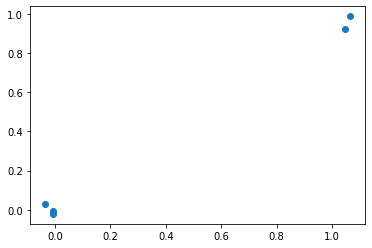

In [ ]:
plt.scatter(x_,y);

In [ ]:
x=[(-0.0352,0.0306),(-0.0058,-0.0050),(-0.0082,-0.0213),(1.0641,0.9885),(1.0494,0.9247)]  #observaciones
e = [0,0,0,0,1]

In [ ]:
import sklearn.metrics
sklearn.metrics.silhouette_samples(x, e)

array([ 0.629401  ,  0.63908884,  0.63637352, -0.95526945,  0.        ])

In [ ]:
#valor medio de silueta
(0.62931961+  0.63901181+  0.63629711 -0.9552073 +  0.  )/5

0.18988424600000003

In [ ]:
e_ = [0,0,0,1,1] #nueva asignación que ofrece mejores valores de silueta
sklearn.metrics.silhouette_samples(x, e_)

array([0.96344829, 0.97814448, 0.97407269, 0.95526945, 0.95357629])

# 2. Agrupamiento particional. Algoritmo k-medias


# Entrega
**Considerando únicamente las características “índice de masa corporal” y “glucosa”, representa el dispersión de puntos (scatter plot) con las características indicadas y las clases reales.**



In [ ]:
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from matplotlib.markers import MarkerStyle
#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


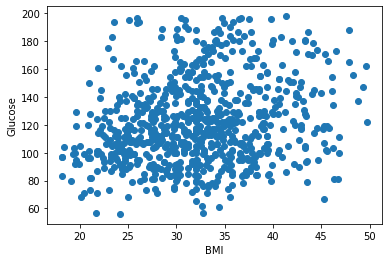

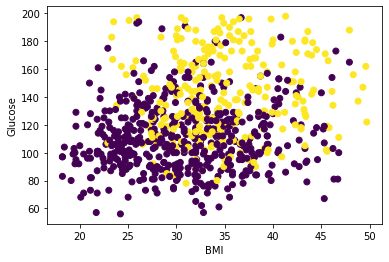

In [ ]:
# Cargamos los datos 
df = pd.read_csv('pima_indias_prepro.csv')
X = df[['BMI','Glucose']] 

# Scatter plot sin indicar las clases
X_BMI = df['BMI']
X_Glucose = df['Glucose']

plt.figure()
plt.scatter(X_BMI, X_Glucose)
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()  


# Scatter plot etiquetado (dos clases)
labels = df['Outcome']
plt.figure()
plt.scatter(X_BMI, X_Glucose, c=labels)
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()  


# Entrega

**Sobre las características anteriores, aplique el algoritmo k-medias con k=2, k=3, k=4 y k =5. Represente:**

- **el diagrama de dispersión de puntos con las características indicadas, los k=2 centroides y la asignación de cada caso a un grupo.**

- **el diagrama de dispersión de puntos con las características indicadas, los k=3 centroides y la asignación de cada caso a un grupo.**

- **el diagrama de dispersión de puntos con las características indicadas, los k=4 centroides y la asignación de cada caso a un grupo.**

- **el diagrama de dispersión de puntos con las características indicadas, los k=5 centroides y la asignación de cada caso a un grupo.**


**Para cada agrupamiento, obtenga el SSE asociado. Justifique los resultados**

**Para cada agrupamiento, obtenga la representación del perfil de la silueta y el valor promedio de la silueta.** 


**Teniendo en cuenta tanto la silueta como las representaciones anteriores, ¿qué agrupación elegiría? Justifique su respuesta.**


## k=2

In [ ]:
# Ejecutamos el algorimo k-medias con 2 centroides y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans2 = KMeans(n_clusters=2, verbose=1,random_state=0).fit(X)
centroids2 = kmeans2.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 2-medias: ')
print(centroids2)

print('Suma del Error Cuadrático (SSE): ')
print(kmeans2.inertia_)




Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 253828.4191233977
start iteration
done sorting
end inner loop
Iteration 1, inertia 253764.0103679458
center shift 1.521382e-02 within tolerance 4.751632e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 308763.381782854
start iteration
done sorting
end inner loop
Iteration 1, inertia 277578.3117722861
start iteration
done sorting
end inner loop
Iteration 2, inertia 266453.1141846011
start iteration
done sorting
end inner loop
Iteration 3, inertia 259422.6736845633
start iteration
done sorting
end inner loop
Iteration 4, inertia 256606.48415882845
start iteration
done sorting
end inner loop
Iteration 5, inertia 255635.69568785577
start iteration
done sorting
end inner loop
Iteration 6, inertia 254769.02151443018
start iteration
done sorting
end inner loop
Iteration 7, inertia 253937.8677999262
start iteration
done sorting
end inner loop
Iteration 8, inertia

In [ ]:
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans2 = KMeans(n_clusters=2, verbose=0, init='random', random_state=0).fit(X)
centroids2 = kmeans2.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 2-medias: ')
print(centroids2)

print('Suma del Error cuadrático: ')
print(kmeans2.inertia_)




Coordenadas de los centroides resultantes del algoritmo 2-medias: 
[[ 31.29425287 104.57471264]
 [ 34.04552846 157.86585366]]
Suma del Error cuadrático: 
253737.31221754977


El error cuadrático mide la distancia intracluster, es decir, la distancia media de todos las observaciones a cada centroide. En este caso se obtiene un valor de 253737.312, siendo éste muy elevado, lo cual indica que los clusters no son muy compactos y poco separables. Esto puede ser debido a que los datos están muy dispersos y no normalizados, lo que va influir en el cálculo de las distancias, obteniendo valores elevados.

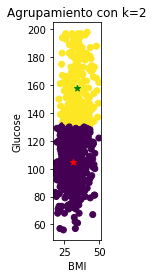

In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 
# Representamos con estrellas rojas las posiciones de los centroides.


etiquetas2 = kmeans2.labels_

plt.figure()
plt.scatter(X_BMI, X_Glucose, c=etiquetas2, label = 'Paciente')
plt.scatter(centroids2[0,0], centroids2[0,1], s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids2[1,0], centroids2[1,1], s = 40, marker= '*', c = 'green', label = 'Centroide 2')
#plt.legend()
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento con k=2')
plt.axis("scaled")
plt.show()  


# COMENTAR RESULTADOS en clase. ¿Variable principal para hacer la división? ¿Por qué?


En la gráfica se observa el resultado del clustering. Los colores determinan el cluster al que pertenecen las observaciones. Como k=2 solo hay dos agrupaciones de los datos.

Se puede observar como la división se hace solo considerando la variable Glucosa. Esto se debe a que el rango dinámico de la glucosa es más grande , por lo que ésta se lleva el cálculo de la distancia (domina Glucosa). Si se quisiera considerar BMI de manera efectiva deberíamos de haber normalizado.


Para n_clusters = 2 , el valor medio de la silueta es: 0.5596778639414427


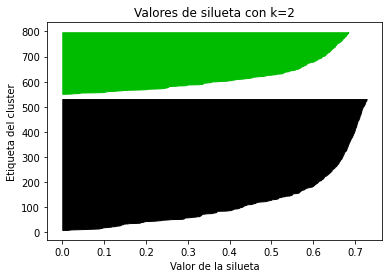

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 2

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X, etiquetas2)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values2 = silhouette_samples(X, etiquetas2)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values2 = \
        sample_silhouette_values2[etiquetas2 == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values2.sort()

    size_cluster_i = ith_cluster_silhouette_values2.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values2,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=2')
plt.show() 

El valor promedio no es muy alto, 0.56.

Por otra parte, hay valores proximos a 0, esto significa que todas las observaciones con estos valores de silueta estarán en el límite de entre los dos grupos. Además, los valores de 0.7 se corresponderan a aquellas observaciones de los limites (200 y 60 de glucosa en el scatter plot). Estas observaciones estarán mejor asignadas. 

Se puede observar como ambos clusters se apróximan a una estructura compacta, es decir, hay menos observaciones con valores cercanos a cero. Sin embargo, a partir de cierta observación disminuye el valor de silueta, indicando la presencia de casos dudosos.

Cabe destacar como el cluster verde no llega a obtener el máximo valor de silueta presente en el cluster negro, lo cual significa que la seguridad de estar bien asignados es menor.

## k = 3

In [ ]:
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans3 = KMeans(n_clusters=3, verbose=0, init='random', random_state=0).fit(X)
centroids3 = kmeans3.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 3-medias: ')
print(centroids3)

print('Suma del Error cuadrático: ')
print(kmeans3.inertia_)




Coordenadas de los centroides resultantes del algoritmo 3-medias: 
[[ 30.64018405  94.65644172]
 [ 34.50070423 170.83802817]
 [ 32.74333333 127.68666667]]
Suma del Error cuadrático: 
136181.23297214782


El error cuadrático es de 136181.233, menor que el obtenido con k = 2. Esto se debe a que a medida que aumenta el número de grupos (clusters), la distancia de cada observación a cada uno de los centroides es menor y el error cuadrático disminuye. 

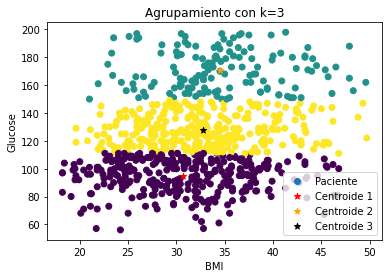

In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 
# Representamos con estrellas rojas las posiciones de los centroides.


etiquetas3 = kmeans3.labels_

plt.figure()
plt.scatter(X_BMI, X_Glucose, c=etiquetas3, label = 'Paciente')
plt.scatter(centroids3[0,0], centroids3[0,1], s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids3[1,0], centroids3[1,1], s = 40, marker= '*', c = 'orange', label = 'Centroide 2')
plt.scatter(centroids3[2,0], centroids3[2,1], s = 40, marker= '*', c = 'black', label = 'Centroide 3')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento con k=3')
plt.show()  


# COMENTAR RESULTADOS en clase. ¿Variable principal para hacer la división? ¿Por qué?


En la gráfica se observa el resultado del clustering. Los colores determinan el cluster al que pertenecen las observaciones. Como k=3, hay tres agrupaciones de los datos.

Se puede observar como la variable Glucosa sigue siendo la única considerada para la división de los grupos.

Para n_clusters = 3 , el valor medio de la silueta es: 0.48368576131089586


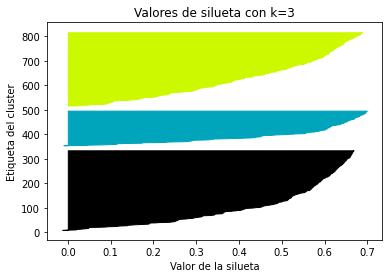

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 3

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X, etiquetas3)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values3 = silhouette_samples(X, etiquetas3)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values3 = \
        sample_silhouette_values3[etiquetas3 == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values3.sort()

    size_cluster_i = ith_cluster_silhouette_values3.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values3,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=3')
plt.show() 

El valor promedio ha disminuido con respecto al anterior, siendo éste 0.483. Esto se debe a que al incorporar un nuevo cluster, aumentan las zonas con casos dudosos, frontera entre un cluster u otro. Estos casos dudosos son aquellos que tienen un valor en la silueta cercano a cero y como se observa en el gráfico hay más número de observaciones con este valor.   

Por otra parte, se han reducido el número de observaciones con valores de 0.7, ya que la probabilidad de que un caso esté mal asigando aumenta al incorporar un cluster más en este caso, pero porque los clusters estan muy cerca entre si.

Se puede observar que el cluster azul tiene una estructura más compacta, es decir, hay menos observaciones con valores cercanos a cero. Sin embargo, el cluster verde presenta una estructura parecida a un triángulo, lo cual indica que hay más casos dudosos, al disminuir significativamente el valor de la silueta a lo largo de las observaciones pertenecientes a ese cluster. Por otro lado, el cluster negro sufre el mismo comportamiento que el verde, pero no tan significativo.


## k = 4

In [ ]:
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans4 = KMeans(n_clusters=4, verbose=0, init='random', random_state=0).fit(X)
centroids4 = kmeans4.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 4-medias: ')
print(centroids4)

print('Suma del Error cuadrático: ')
print(kmeans4.inertia_)




Coordenadas de los centroides resultantes del algoritmo 4-medias: 
[[ 34.92268041 178.17525773]
 [ 33.43831169 144.19480519]
 [ 30.5525641   89.6965812 ]
 [ 31.88869258 116.41342756]]
Suma del Error cuadrático: 
93355.80404485945


El error cuadrático es de 93356.495, siendo éste menor a los obtenidos anteriormente. Esto se debe a que, como se ha comentado con k = 3, a medida que aumenta el número de grupos (clusters), la distancia de cada observación a cada uno de los centroides es menor y el error cuadrático disminuye.


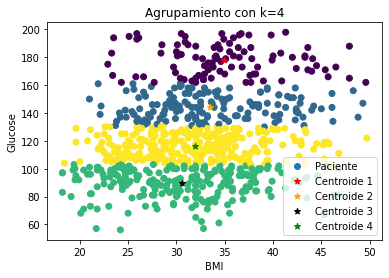

In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 
# Representamos con estrellas rojas las posiciones de los centroides.


etiquetas4 = kmeans4.labels_

plt.figure()
plt.scatter(X_BMI, X_Glucose, c=etiquetas4, label = 'Paciente')
plt.scatter(centroids4[0,0], centroids4[0,1], s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids4[1,0], centroids4[1,1], s = 40, marker= '*', c = 'orange', label = 'Centroide 2')
plt.scatter(centroids4[2,0], centroids4[2,1], s = 40, marker= '*', c = 'black', label = 'Centroide 3')
plt.scatter(centroids4[3,0], centroids4[3,1], s = 40, marker= '*', c = 'green', label = 'Centroide 4')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento con k=4')
plt.show()  


# COMENTAR RESULTADOS en clase. ¿Variable principal para hacer la división? ¿Por qué?


En la gráfica se observa el resultado del clustering. Los colores determinan el cluster al que pertenecen las observaciones. Como k=4, hay cuatro agrupaciones de los datos.
Se puede observar como la variable Glucosa sigue siendo la única considerada para la división de los grupos.

Para n_clusters = 4 , el valor medio de la silueta es: 0.442473751261761


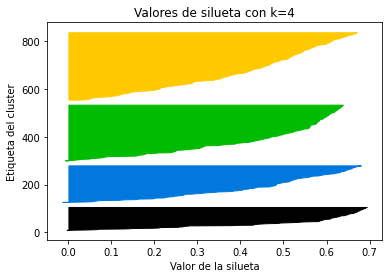

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 4

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X, etiquetas4)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values4 = silhouette_samples(X, etiquetas4)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values4 = \
        sample_silhouette_values4[etiquetas4 == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values4.sort()

    size_cluster_i = ith_cluster_silhouette_values4.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values4,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=4')
plt.show() 

El valor promedio ha disminuido con respecto al anterior, siendo éste 0.443. Se puede observar que el cluster negro tiene una estructura más compacta, es decir, hay menos observaciones con valores cercanos a cero. Sin embargo, el cluster naranja presenta una estructura parecida a un triángulo, lo cual indica que hay más casos dudosos, al disminuir significativamente el valor de la silueta a lo largo de las observaciones pertenecientes a ese cluster. Por otro lado, el cluster azul sufre el mismo comportamiento que el naranja, teniendo incluso más observaciones con casos dudosos.  

Cabe destacar como el cluster verde no llega a obtener un valor de silueta cercano a 0.7 como el resto. Lo cual significa que la seguridad de estar bien asignados es menor, pero no presenta una caida tan abrupta como en los clusters naranja y azul.  

## k = 5

In [ ]:
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans5 = KMeans(n_clusters=5, verbose=0, init='random', random_state=0).fit(X)
centroids5 = kmeans5.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 5-medias: ')
print(centroids5)

print('Suma del Error cuadrático: ')
print(kmeans5.inertia_)




Coordenadas de los centroides resultantes del algoritmo 5-medias: 
[[ 33.69708029 147.54014599]
 [ 32.54947368 123.62631579]
 [ 34.85795455 179.79545455]
 [ 30.70373134  83.06716418]
 [ 30.72191781 103.96347032]]
Suma del Error cuadrático: 
70045.77022504853


El error cuadrático es de 70044.65, siendo éste menor a los obtenidos anteriormente. Esto se debe a que, como se ha comentado con k = 3 y k = 4 , a medida que aumenta el número de grupos (clusters),la distancia de cada observación a cada uno de los centroides es menor y el error cuadrático disminuye.


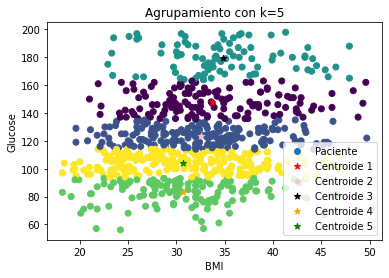

In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 
# Representamos con estrellas rojas las posiciones de los centroides.


etiquetas5 = kmeans5.labels_

plt.figure()
plt.scatter(X_BMI, X_Glucose, c=etiquetas5, label = 'Paciente')
plt.scatter(centroids5[0,0], centroids5[0,1], s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids5[1,0], centroids5[1,1], s = 40, marker= '*', c = 'pink', label = 'Centroide 2')
plt.scatter(centroids5[2,0], centroids5[2,1], s = 40, marker= '*', c = 'black', label = 'Centroide 3')
plt.scatter(centroids5[3,0], centroids5[3,1], s = 40, marker= '*', c = 'orange', label = 'Centroide 4')
plt.scatter(centroids5[4,0], centroids5[4,1], s = 40, marker= '*', c = 'green', label = 'Centroide 5')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento con k=5')
plt.show()  


# COMENTAR RESULTADOS en clase. ¿Variable principal para hacer la división? ¿Por qué?


En la gráfica se observa el resultado del clustering. Los colores determinan el cluster al que pertenecen las observaciones. Como k = 5, hay cinco particiones de los datos.
Se puede observar como la variable Glucosa sigue siendo la única considerada para la división de los grupos.

Para n_clusters = 5 , el valor medio de la silueta es: 0.41086723391054397


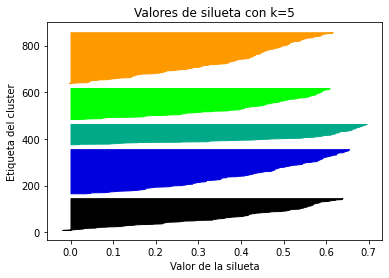

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 5

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X, etiquetas5)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values5 = silhouette_samples(X, etiquetas5)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values5 = \
        sample_silhouette_values5[etiquetas5 == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values5.sort()

    size_cluster_i = ith_cluster_silhouette_values5.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values5,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=5')
plt.show() 

El valor promedio ha disminuido con respecto al anterior, siendo éste 0.411. 
Se puede observar que el cluster azul verdoso tiene la estructura más compacta, es decir, tienen más valores de siluetas lejanos a cero. Por el contrario, el cluster naranja, verde, azul y negro tienen más valores de silueta cercanos a cero. 

Cabe destacar como el cluster azul verdoso es el único que consigue llegar a un valor de silueta de 0.7, y como el resto disminuye notablemente. Esto puede indicar que k = 5 no sería un valor muy adecuado para realizar la tarea de clasificación. 

In [ ]:
Tabla = pd.DataFrame({ "Prestaciones":["Silueta avg","SSE"],
                      "k = 2" : ["0.56","253737.312"],
                      "k = 3" : ["0.484"," 136181.233"],
                     "k = 4" : ["0.443","93356.495"],
                     "k = 5" : ["0.411","70045.77"]})
Tabla

,Prestaciones,k = 2,k = 3,k = 4,k = 5
0,Silueta avg,0.56,0.484,0.443,0.411
1,SSE,253737.312,136181.233,93356.495,70045.77


A la vista de esta tabla se puede observar cómo a medida que se va aumentando el valor de k, el valor del error cuadrático disminuye. Esto es debido a que a medida que aumenta el número de clusters, la distancia de cada observación a cada uno de los centroides es menor, al haber mayor número de centroides. Es por ello que esta medida no siempre puede ser considerada para elegir el valor más adecuado de k y por ello es recomendable tener en cuenta, también, la silueta. 

Por otra parte, a partir de las conclusiones obtenidas en cada gráfica de la silueta para cada valor de k, el agrupamiento más adecuado se encuentra con k = 2 ya que es el que mayor valor medio de silueta obtiene y menos observaciones con valor cercano a cero en ambos grupos. Lo cual es el valor de k que ofrece, con mayor seguridad, que las observaciones han sido adecuadamente asignadas. 

Se tiene en cuenta que el valor de SSE es muy elevado, pero si se hubieran normalizado los datos se obtendría un valor menor.


# Entrega 

**Para cada agrupamiento, identifique los casos “más dudosos” a través del valor de la silueta. Explique el procedimiento seguido para realizar la identificación y represente gráficamente estos casos en el scatter plot correspondiente, asignándoles un color o un símbolo diferente.**

**Justifique los resultados.**



Para detectar los casos dudosos se sigue el siguiente procedimiento. 

Para aquellas observaciones que han obtenido un valor inferior al umbral, en este caso se elige 0.1 ya que es un valor cercano a cero, se les asigna el color azul. El resto de observaciones que no superen el umbral mantendrán el color correspondiente al cluster. 

## K = 2

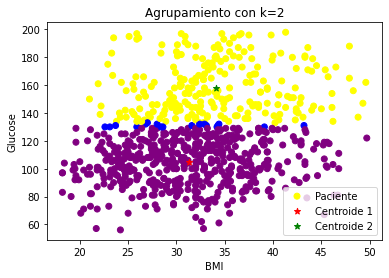

In [ ]:
# Representamos casos dudosos

colores_2 = ['purple','yellow','blue']
asignar_2 = []
dudosos = []

lista = []
for i in range(len(sample_silhouette_values2)):
    lista.append(sample_silhouette_values2[i])
    

for i in range(len(etiquetas2)):
    if lista[i]<0.1:     # UMBRAL A MODIFICAR, TAMBIEN EL SIGNO (ABS) y LA DESIGUALDAD
        asignar_2.append('blue')
        dudosos.append(etiquetas2[i])
    
    else:
        asignar_2.append(colores_2[etiquetas2[i]])
        
    
    
plt.figure()
plt.scatter(X_BMI, X_Glucose, c=asignar_2, label = 'Paciente')
plt.scatter(centroids2[0,0], centroids2[0,1], s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids2[1,0], centroids2[1,1], s = 40, marker= '*', c = 'green', label = 'Centroide 2')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento con k=2')
plt.show()  




Corroborando las conclusiones de los anteriores apartados en el etiquetado de los clusters, los valores más dudosos se corresponden con las observaciones que se encuentran en la frontera entre ambos grupos. Un caso dudoso se refiere a que tiene una probabilidad similar de pertenencia a uno u otro cluster. En esta gráfica se observa como esos valores son los detectados en azul. Si se aumentara el umbral aparecerían más casos dudosos. 

## K = 3

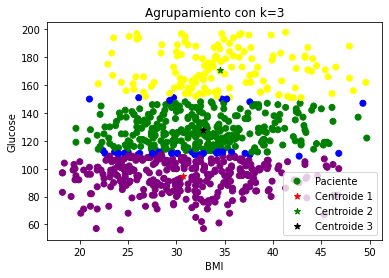

In [ ]:
# Representamos casos dudosos

colores_3 = ['purple','yellow','green','blue']
asignar_3 = []
dudosos = []

lista = []
for i in range(len(sample_silhouette_values3)):
    lista.append(sample_silhouette_values3[i])
    

for i in range(len(etiquetas3)):
    if lista[i]<0.1:     # UMBRAL A MODIFICAR, TAMBIEN EL SIGNO (ABS) y LA DESIGUALDAD
        asignar_3.append('blue')
        dudosos.append(etiquetas3[i])
    
    else:
        asignar_3.append(colores_3[etiquetas3[i]])
        
    
    
plt.figure()
plt.scatter(X_BMI, X_Glucose, c=asignar_3, label = 'Paciente')
plt.scatter(centroids3[0,0], centroids3[0,1], s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids3[1,0], centroids3[1,1], s = 40, marker= '*', c = 'green', label = 'Centroide 2')
plt.scatter(centroids3[2,0], centroids3[2,1], s = 40, marker= '*', c = 'black', label = 'Centroide 3')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento con k=3')
plt.show()  




En este caso se encuentran dos zonas con valores detectados como casos dudosos. Al incluir un nuevo cluster, se tienen dos fronteras y por tanto el número de éstos aumenta. 


## K = 4

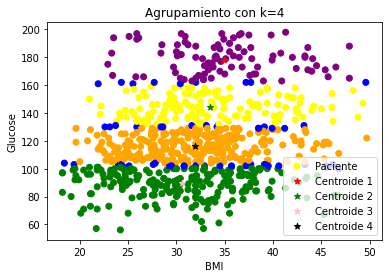

In [ ]:
# Representamos casos dudosos

colores_4 = ['purple','yellow','green','orange','blue']
asignar_4 = []
dudosos = []

lista = []
for i in range(len(sample_silhouette_values4)):
    lista.append(sample_silhouette_values4[i])
    

for i in range(len(etiquetas4)):
    if lista[i]<0.1:     # UMBRAL A MODIFICAR, TAMBIEN EL SIGNO (ABS) y LA DESIGUALDAD
        asignar_4.append('blue')
        dudosos.append(etiquetas4[i])
    
    else:
        asignar_4.append(colores_4[etiquetas4[i]])
        
    
    
plt.figure()
plt.scatter(X_BMI, X_Glucose, c=asignar_4, label = 'Paciente')
plt.scatter(centroids4[0,0], centroids4[0,1], s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids4[1,0], centroids4[1,1], s = 40, marker= '*', c = 'green', label = 'Centroide 2')
plt.scatter(centroids4[2,0], centroids4[2,1], s = 40, marker= '*', c = 'pink', label = 'Centroide 3')
plt.scatter(centroids4[3,0], centroids4[3,1], s = 40, marker= '*', c = 'black', label = 'Centroide 4')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento con k=4')
plt.show()  




En este caso se encuentran tres zonas con valores detectados como casos dudosos. Al incluir dos nuevos cluster, se tienen tres fronteras y por tanto el número de éstos aumenta. 

## K = 5

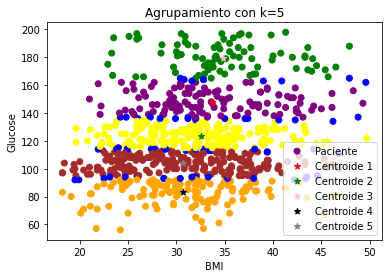

In [ ]:
# Representamos casos dudosos

colores_5 = ['purple','yellow','green','orange','brown','blue']
asignar_5 = []
dudosos = []

lista = []
for i in range(len(sample_silhouette_values5)):
    lista.append(sample_silhouette_values5[i])
    

for i in range(len(etiquetas5)):
    if lista[i]<0.1:     # UMBRAL A MODIFICAR, TAMBIEN EL SIGNO (ABS) y LA DESIGUALDAD
        asignar_5.append('blue')
        dudosos.append(etiquetas5[i])
    
    else:
        asignar_5.append(colores_5[etiquetas5[i]])
        
    
    
plt.figure()
plt.scatter(X_BMI, X_Glucose, c=asignar_5, label = 'Paciente')
plt.scatter(centroids5[0,0], centroids5[0,1], s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids5[1,0], centroids5[1,1], s = 40, marker= '*', c = 'green', label = 'Centroide 2')
plt.scatter(centroids5[2,0], centroids5[2,1], s = 40, marker= '*', c = 'pink', label = 'Centroide 3')
plt.scatter(centroids5[3,0], centroids5[3,1], s = 40, marker= '*', c = 'black', label = 'Centroide 4')
plt.scatter(centroids5[4,0], centroids5[4,1], s = 40, marker= '*', c = 'grey', label = 'Centroide 5')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento con k=5')
plt.show()  




En este caso se encuentran cuatro zonas con valores detectados como casos dudosos. Al incluir tres nuevos cluster, se tienen cuatro fronteras y por tanto el número de éstos aumenta. 

# Entrega

**Considere ahora la variable binaria “Outcome” asociada a cada caso, variable que identifica la clase a la que pertenece cada caso. Una vez construidos los grupos, se propone el siguiente procedimiento para asignar una “etiqueta” binaria a cada centroide.**

**Procedimiento ---  Recorremos la lista de etiquetas generadas con k clusters. Para cada cluster:**
- **contabilizamos el número de pacientes del cluster con etiqueta 0 (no diabéticos) y con etiqueta 1 (diabéticos)**
- **asignamos al cluster la etiqueta mayoritaria**
- **clasificamos las observaciones de cada cluster como pertenecientes a la clase con la etiqueta mayoritaria**
- **calculamos prestaciones con este etiquetado externo**


**Para todas las agrupaciones anteriores, implemente el procedimiento anterior para proporcionar una etiqueta a cada caso. Tenga en cuenta que la etiqueta de una misma observación puede ser diferente según los grupos considerados  (k=2, k=3, k=4 y k=5 grupos). Proporcione, para cada agrupación, varias medidas de calidad de la clasificación obtenida. Justifique los resultados y extraiga conclusiones.**


# Entrega

**Cree una función que permita calcular las siguientes prestaciones:**
- **tasa de acierto**
- **sensibilidad**
- **especificidad**
- **F1-score**

**Haga uso de esta función para discutir sobre las prestaciones (figuras de mérito) en todas las evaluaciones externas de esta práctica.**


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

def figuras_merito(etiqueta,labels): 
    accuracy = accuracy_score (labels,etiqueta)
    recall = recall_score (labels,etiqueta)
    f1 = f1_score (labels,etiqueta)
    specificity = confusion_matrix(labels,etiqueta)[0][0]/(confusion_matrix(labels,etiqueta)[0][0]+confusion_matrix(labels,etiqueta)[0][1])
    
    return accuracy,recall,f1,specificity


## K = 2


In [ ]:
# Implementación del procedimiento de clasificación externa considerando K = 2, 
# y las características originales 

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0



for i in range(len(etiquetas2)):
    if etiquetas2[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas2[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
            
print('___________________________******______________________________')
print('Con k=2 y BMI y Glucosa  como características (sin normalizar)')
print('___________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)   

___________________________******______________________________
Con k=2 y BMI y Glucosa  como características (sin normalizar)
___________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 410
Numero de pacientes diabéticos en el Cluster 1: 112
Número de pacientes NO diabéticos en el Cluster 2:  90
Número de pacientes diabéticos en el Cluster 2: 156
___________________________
Número total de pacientes en el Cluster 1: 522
Número total de pacientes en el Cluster 2: 246


ASIGNACIÓN DE CLASES A CLUSTERS

* Puesto que en el Cluster 1 tenemos 522 pacientes (410 no diabéticos y 112 diabéticos), asignaremos la etiqueta '0' a todos los pacientes de este cluster, indicando así el grupo corresponde a pacientes no diabéticos.


* Puesto que en el Cluster 2 tenemos 246 pacientes (90 no diabéticos y 156 diabéticos), asignaremos la etiqueta '1' a todos los pacientes de este cluster, indicando así el grupo corresponde a pacientes diabéticos.
  

In [ ]:
accuracy_2,recall_2,f1_2,specificity_2 = figuras_merito(etiquetas2,labels)

print("Accuracy con k = 2", accuracy_2)
print("Sensibilidad con k = 2", recall_2)
print("F1 con k = 2", f1_2)
print("Specificity con k = 2", specificity_2)

Accuracy con k = 2 0.7369791666666666
Sensibilidad con k = 2 0.582089552238806
F1 con k = 2 0.6070038910505836
Specificity con k = 2 0.82


## K=3

In [ ]:
# Implementación del procedimiento de clasificación externa considerando K = 3, 
# y las características originales 

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0



for i in range(len(etiquetas3)):
    if etiquetas3[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas3[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas3[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
            
print('___________________________******______________________________')
print('Con k=3 y BMI y Glucosa  como características (sin normalizar)')
print('___________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3: ',no_diab3)
print('Número de pacientes diabéticos en el Cluster 3:',diab3)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2) 
print('Número total de pacientes en el Cluster 3:',cluster3)  

___________________________******______________________________
Con k=3 y BMI y Glucosa  como características (sin normalizar)
___________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 283
Numero de pacientes diabéticos en el Cluster 1: 43
Número de pacientes NO diabéticos en el Cluster 2:  37
Número de pacientes diabéticos en el Cluster 2: 105
Número de pacientes NO diabéticos en el Cluster 3:  180
Número de pacientes diabéticos en el Cluster 3: 120
___________________________
Número total de pacientes en el Cluster 1: 326
Número total de pacientes en el Cluster 2: 142
Número total de pacientes en el Cluster 3: 300


In [ ]:
for index, value in enumerate (etiquetas3):
    if value == 2:
        etiquetas3[index]=0

In [ ]:
accuracy_3,recall_3,f1_3,specificity_3 = figuras_merito(etiquetas3,labels)

print("Accuracy con k = 3", accuracy_3)
print("Sensibilidad con k = 3", recall_3)
print("F1 con k = 3", f1_3)
print("Specificity con k = 3", specificity_3)

Accuracy con k = 3 0.7395833333333334
Sensibilidad con k = 3 0.3917910447761194
F1 con k = 3 0.5121951219512196
Specificity con k = 3 0.926


## K = 4

In [ ]:
# Implementación del procedimiento de clasificación externa considerando K = 4, 
# y las características originales 

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0

cluster4=0
diab4 = 0
no_diab4 = 0


for i in range(len(etiquetas4)):
    if etiquetas4[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas4[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas4[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
    if etiquetas4[i]==3:
        cluster4+=1
        if labels[i]==0:
            no_diab4+=1
        else:
            diab4+=1
            
print('___________________________******______________________________')
print('Con k=4 y BMI y Glucosa  como características (sin normalizar)')
print('___________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3: ',no_diab3)
print('Número de pacientes diabéticos en el Cluster 3:',diab3)
print('Número de pacientes NO diabéticos en el Cluster 4: ',no_diab4)
print('Número de pacientes diabéticos en el Cluster 4:',diab4)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2) 
print('Número total de pacientes en el Cluster 3:',cluster3)  
print('Número total de pacientes en el Cluster 4:',cluster4)

___________________________******______________________________
Con k=4 y BMI y Glucosa  como características (sin normalizar)
___________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 17
Numero de pacientes diabéticos en el Cluster 1: 80
Número de pacientes NO diabéticos en el Cluster 2:  75
Número de pacientes diabéticos en el Cluster 2: 79
Número de pacientes NO diabéticos en el Cluster 3:  211
Número de pacientes diabéticos en el Cluster 3: 23
Número de pacientes NO diabéticos en el Cluster 4:  197
Número de pacientes diabéticos en el Cluster 4: 86
___________________________
Número total de pacientes en el Cluster 1: 97
Número total de pacientes en el Cluster 2: 154
Número total de pacientes en el Cluster 3: 234
Número total de pacientes en el Cluster 4: 283


In [ ]:
for index, value in enumerate (etiquetas4): 
    if value == 0:
        etiquetas4[index]=1
    if value == 2:
        etiquetas4[index]=0
    if value == 3:
        etiquetas4[index]=0

In [ ]:
accuracy_4,recall_4,f1_4,specificity_4 = figuras_merito(etiquetas4,labels)

print("Accuracy con k = 4", accuracy_4)
print("Sensibilidad con k = 4", recall_4)
print("F1 con k = 4", f1_4)
print("Specificity con k = 4", specificity_4)

Accuracy con k = 4 0.73828125
Sensibilidad con k = 4 0.5932835820895522
F1 con k = 4 0.6127167630057804
Specificity con k = 4 0.816


In [ ]:
# Implementación del procedimiento de clasificación externa considerando K = 5, 
# y las características originales 

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0

cluster4=0
diab4 = 0
no_diab4 = 0

cluster5=0
diab5 = 0
no_diab5 = 0


for i in range(len(etiquetas5)):
    if etiquetas5[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas5[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas5[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
    if etiquetas5[i]==3:
        cluster4+=1
        if labels[i]==0:
            no_diab4+=1
        else:
            diab4+=1
    if etiquetas5[i]==4:
        cluster5+=1
        if labels[i]==0:
            no_diab5+=1
        else:
            diab5+=1
            
print('___________________________******______________________________')
print('Con k=5 y BMI y Glucosa  como características (sin normalizar)')
print('___________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3: ',no_diab3)
print('Número de pacientes diabéticos en el Cluster 3:',diab3)
print('Número de pacientes NO diabéticos en el Cluster 4: ',no_diab4)
print('Número de pacientes diabéticos en el Cluster 4:',diab4)
print('Número de pacientes NO diabéticos en el Cluster 5: ',no_diab5)
print('Número de pacientes diabéticos en el Cluster 5:',diab5)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2) 
print('Número total de pacientes en el Cluster 3:',cluster3)  
print('Número total de pacientes en el Cluster 4:',cluster4)
print('Número total de pacientes en el Cluster 5:',cluster5)

___________________________******______________________________
Con k=5 y BMI y Glucosa  como características (sin normalizar)
___________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 64
Numero de pacientes diabéticos en el Cluster 1: 73
Número de pacientes NO diabéticos en el Cluster 2:  119
Número de pacientes diabéticos en el Cluster 2: 71
Número de pacientes NO diabéticos en el Cluster 3:  16
Número de pacientes diabéticos en el Cluster 3: 72
Número de pacientes NO diabéticos en el Cluster 4:  125
Número de pacientes diabéticos en el Cluster 4: 9
Número de pacientes NO diabéticos en el Cluster 5:  176
Número de pacientes diabéticos en el Cluster 5: 43
___________________________
Número total de pacientes en el Cluster 1: 137
Número total de pacientes en el Cluster 2: 190
Número total de pacientes en el Cluster 3: 88
Número total de pacientes en el Cluster 4: 134
Número total de pacientes en el Cluster 5: 219


In [ ]:
for index, value in enumerate (etiquetas5):
    if value == 0:
        etiquetas5[index]=1
    if value == 1:
        etiquetas5[index]=0
    if value == 2:
        etiquetas5[index]=1
    if value == 3:
        etiquetas5[index]=0
    if value == 4:
        etiquetas5[index]=0

In [ ]:
accuracy_5,recall_5,f1_5,specificity_5 = figuras_merito(etiquetas5,labels)

print("Accuracy con k = 5", accuracy_5)
print("Sensibilidad con k = 5", recall_5)
print("F1 con k = 5", f1_5)
print("Specificity_5 con k = 5", specificity_5)

Accuracy con k = 5 0.7356770833333334
Sensibilidad con k = 5 0.5410447761194029
F1 con k = 5 0.5882352941176471
Specificity_5 con k = 5 0.84


In [ ]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy","Sensibility", 'Specificity','F1'], 
                      "k = 2" : [accuracy_2,recall_2,specificity_2,f1_2],
                      "k = 3" : [accuracy_3,recall_3,specificity_3,f1_3],
                      "k = 4" : [accuracy_4,recall_4,specificity_4,f1_4],
                      "k = 5" : [accuracy_5,recall_5,specificity_5,f1_5]})
Tabla


,Prestaciones,k = 2,k = 3,k = 4,k = 5
0,Accuracy,0.736979,0.739583,0.738281,0.735677
1,Sensibility,0.582090,0.391791,0.593284,0.541045
2,Specificity,0.820000,0.926000,0.816000,0.840000
3,F1,0.607004,0.512195,0.612717,0.588235


Considerando la evaluación externa de los diferentes clusters se obtienen unas prestaciones muy similares para los diferentes valores de k.

k = 3 obtiene 3 clusters, dos de ellos se relacionan con los pacientes no diabéticos y uno con los pacientes diabéticos, lo cual tiene sentido pues al tener un base de datos desbalanceada con más pacientes no diabéticos. 

k = 4 obtiene 4 clusters, dos de ellos se relacionan con los pacientes no diabéticos y los otros dos con los pacientes diabéticos.

k = 5 obtiene 5 clusters, 3 cluster con pacientes no diabéticos y 2 con pacientes diabéticos. 

Si solo se tiene en cuenta la evaluación externa daría igual un agrupamiento con 2,3,4 o 5 ya que presentan valores muy similares. No obstante, se elegiría el k = 2 ya que es el modelo más sencillo. 

Por lo que la decisión de elegir un número de clusters u otro se basará dependiendo del principal objetivo del problema y como éste se quiera abordar.





# Entrega

**Implemente el algoritmo 2-medias considerando únicamente la característica “BMI” de las observaciones originales (sin pre-procesamiento). Obtenga el valor de SSE, la silueta y las figuras de mérito de clasificación.**

**Discuta los resultados, relacionando sus respuestas con las proporcionadas el el primer apartado de la práctica.** 


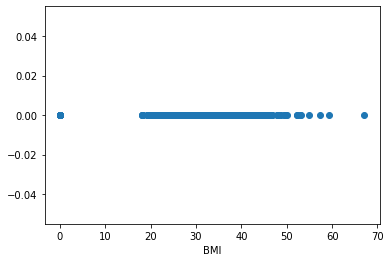

Coordenadas de los centroides resultantes del algoritmo 2-medias sobre X_bmi: 
[[25.94609164]
 [37.64307305]]
Suma del Error cuadrático: 
21437.49528376571


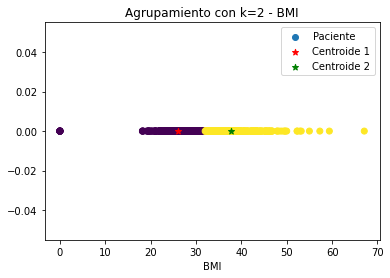

In [ ]:
# A modo de ejemplo, en las siguientes celdas se ha implementado el 2-medias pero considerando otra característica,
# la característica “Presión sanguínea” de las observaciones originales (sin pre-procesamiento)

# Scatter plot sin indicar las clases

df = pd.read_csv('pima_indian_diabetes.csv') 


X_bmi = df['BMI']


plt.scatter(X_bmi, 0*X_bmi)
plt.xlabel('BMI')
plt.show()  

X_bmi_arr = np.asarray(X_bmi)

kmeans2_bmi = KMeans(n_clusters=2, verbose=0, init='random', random_state=0).fit(X_bmi_arr.reshape(-1,1))
centroids2_bmi = kmeans2_bmi.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 2-medias sobre X_bmi: ')
print(centroids2_bmi)

print('Suma del Error cuadrático: ')
print(kmeans2_bmi.inertia_)


etiquetas2_bmi = kmeans2_bmi.labels_

plt.figure()
plt.scatter(X_bmi,0*X_bmi, c=etiquetas2_bmi, label = 'Paciente')
plt.scatter(centroids2_bmi[0], 0, s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids2_bmi[1], 0, s = 40, marker= '*', c = 'green', label = 'Centroide 2')
plt.legend()
plt.xlabel('BMI')
plt.title('Agrupamiento con k=2 - BMI')
plt.show()  

En la gráfica se observa el resultado del clustering. Los colores determinan el cluster al que pertenecen las observaciones. Como k = 2 solo hay dos particiones de los datos.

Al hacer uso de la base datos sin preprocesar, la creación de los clusters se ve influenciada por la presencia de valores atípicos y valores perdidos. Esto influye a la hora de elegir el centroide y como consecuencia en la asignación de cada una de las observaciones al cluster más cercano. 

En cuanto al error cuadrático es de 21437.49, significativamente inferior al obtenido con dos características, 253737.312. Esto puede ser debido a que los datos están menos dispersos cuando se utiliza una característica, disminuyendo la variación intracluster. 


Para n_clusters = 2 , SOLO CON BMI, el valor medio de la silueta es: 0.5368357931544613


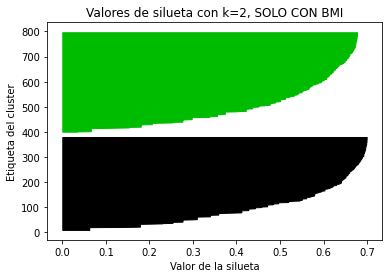

In [ ]:
n_clusters = 2

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X_bmi_arr.reshape(-1,1), etiquetas2_bmi)
print("Para n_clusters =", n_clusters,
              ", SOLO CON BMI, el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values = silhouette_samples(X_bmi_arr.reshape(-1,1), etiquetas2_bmi)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values[etiquetas2_bmi == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=2, SOLO CON BMI')
plt.show() 

El valor promedio no es muy alto, 0.54. Esto indica que hay un equilibrio entre observaciones cercanas a valores de 1 (alta seguridad en la asignación de clusters) y observaciones cercanas a cero (casos dudosos). 

Cabe destacar como el cluster verde no llega a obtener el máximo valor de silueta presente en el cluster negro, lo cual significa que la seguridad de estar bien asignados es menor, aunque ronda el 0.65.

In [ ]:
# K = 2, con el cluster con sólo una característica

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0



for i in range(len(etiquetas2_bmi)):
    if etiquetas2_bmi[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas2_bmi[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
            
print('_________******____________')
print('Con k=2 y Sólo "BMI" como característica')
print('_________******____________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)

    

_________******____________
Con k=2 y Sólo "BMI" como característica
_________******____________
Número de pacientes NO diabéticos en el Cluster 1: 287
Numero de pacientes diabéticos en el Cluster 1: 84
Número de pacientes NO diabéticos en el Cluster 2:  213
Número de pacientes diabéticos en el Cluster 2: 184
___________________________
Número total de pacientes en el Cluster 1: 371
Número total de pacientes en el Cluster 2: 397


In [ ]:
for index, value in enumerate (etiquetas2_bmi):
    if value == 1:
        etiquetas2_bmi[index]=0

In [ ]:
accuracy_2_bmi,recall_2_bmi,f1_2_bmi,specificity_2_bmi = figuras_merito(etiquetas2_bmi,labels)

print("Accuracy con k = 2 - BMI", accuracy_2_bmi)
print("Sensibilidad con k = 2 - BMI", recall_2_bmi)
print("F1 con k = 2 - BMI", f1_2_bmi)
print("Specificity con k = 2 - BMI", specificity_2_bmi)

Accuracy con k = 2 - BMI 0.6510416666666666
Sensibilidad con k = 2 - BMI 0.0
F1 con k = 2 - BMI 0.0
Specificity con k = 2 - BMI 1.0


A la vista de la evaluación externa este modelo, que utiliza exclusivamente la variable BMI, no consigue difrenciar entre diabéticos y no diabéticos, ya que ha clasificado a todos como no diabéticos, de ahí su especificidad igual a 1 y su sensibilidad igual a 0. 

# Entrega

**Evalúe el efecto de realizar la normalización de las características, tanto en el caso con dos características como en el caso de una única características.**

**Para evaluar este efecto, puede considerar representaciones gráficas, valores de SSE, silueta y figuras de mérito con evaluación externa. Discuta los resultados.** 



## BMI -  GLUCOSE Normalizados

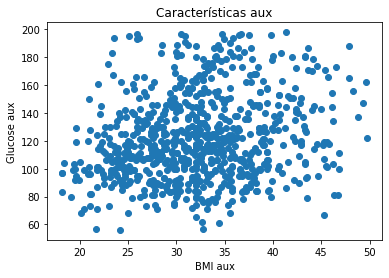

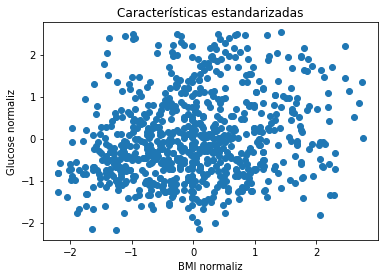

In [ ]:
# Normalización (estandarización) de las dos características X_BMI, X_Glucose
from sklearn import preprocessing

# Convertimos el objeto dataframe en un array (mayor velocidad de cómputo)
pima_indians_df = pd.read_csv('pima_indias_prepro.csv')
array = pima_indians_df.values
# Extraemos las variables de entrada al modelo (8 primeras) 
X = array[:,[1,5]]


X_Glucose_aux = X[:,0];
X_BMI_aux =  X[:,1];
plt.figure()
plt.scatter(X_BMI_aux, X_Glucose_aux)
plt.xlabel('BMI aux')
plt.ylabel('Glucose aux')
plt.title('Características aux')
plt.show()  


scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)

X_Glucose_norm = X_norm[:,0];
X_BMI_norm =  X_norm[:,1];


plt.figure()
plt.scatter(X_BMI_norm, X_Glucose_norm)
plt.xlabel('BMI normaliz')
plt.ylabel('Glucose normaliz')
plt.title('Características estandarizadas')
plt.show()  


Coordenadas de los centroides resultantes del algoritmo 2-medias (vv.aa. normaliz): 
[[-0.59563526 -0.48172664]
 [ 0.81189668  0.65663047]]
Suma del Error cuadrático (vv.aa. normaliz): 
921.6685971133502


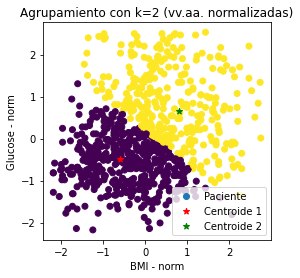

In [ ]:
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans2_norm = KMeans(n_clusters=2, verbose=0, init='random', random_state=0).fit(X_norm)
centroids2_norm = kmeans2_norm.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 2-medias (vv.aa. normaliz): ')
print(centroids2_norm)

print('Suma del Error cuadrático (vv.aa. normaliz): ')
print(kmeans2_norm.inertia_)

etiquetas2_norm = kmeans2_norm.labels_

plt.figure()
plt.scatter(X_BMI_norm, X_Glucose_norm, c=etiquetas2_norm, label = 'Paciente')
plt.scatter(centroids2_norm[0,0], centroids2_norm[0,1], s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids2_norm[1,0], centroids2_norm[1,1], s = 40, marker= '*', c = 'green', label = 'Centroide 2')
plt.legend()
plt.xlabel('BMI - norm')
plt.ylabel('Glucose - norm')
plt.title('Agrupamiento con k=2 (vv.aa. normalizadas)')
plt.axis("scaled")
plt.show()  



Como se puede observar tras normalizar las características, el error cuadrático se ha visto influenciado, disminuyendo considerablemente. Esto es debido a que el SSE tiene en cuenta la posición de cada una de las observaciones, y como ahora los rangos de las variables se encuentran entre -2 y 3, el cálculo de las distancias se va a ver infuenciado. Por otro lado, la normalización ha provocado que ambas variables se encuentren en el mismo rango dinámico y es por ello que ahora la variable BMI es considerada para la división de los datos. 

Para n_clusters = 2 , con características normalizadas, el valor medio de la silueta es: 0.36223740592510306


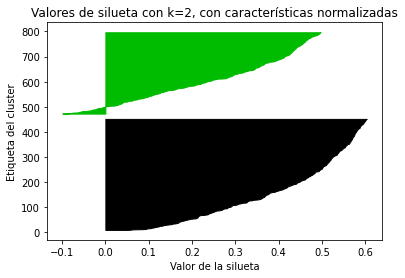

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters = 2

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg_norm = silhouette_score(X_norm, etiquetas2_norm)
print("Para n_clusters =", n_clusters,
          ", con características normalizadas, el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_norm = silhouette_samples(X_norm, etiquetas2_norm)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_norm[etiquetas2_norm == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=2, con características normalizadas')
plt.show() 

Se ha obtenido un valor de silueta medio 0.362. 

Se puede observar que en ambas siluetas se encuentran pocas observaciones con pocos valores altos de silueta. En el cluster negro la mayor parte de las observaciones presenta un valor menor a 0.5 el cual es bajo y el cluster verde muestra como todas sus observaciones presentan valores bajos (<= 0.5).

Cabe destacar como en el cluster superior (en verde) una de las observaciones tiene un valor de silueta menor a cero, es decir, está mal asignado a ese cluster. Esto permite intuir que k = 2 no es el
número más adecuado de clusters para este conjunto de datos, y se debería de analizar con otros k diferentes para ver si estos agrupan mejor.



In [ ]:
# K = 2, con el cluster con las características NORMALIZADAS (estandarizadas)

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0



for i in range(len(etiquetas2_norm)):
    if etiquetas2_norm[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas2_norm[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
            
print('__________________________******______________________________')
print('Con k=2 y BMI y Glucosa  como características (ESTANDARIZADAS)')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)   

__________________________******______________________________
Con k=2 y BMI y Glucosa  como características (ESTANDARIZADAS)
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 367
Numero de pacientes diabéticos en el Cluster 1: 76
Número de pacientes NO diabéticos en el Cluster 2:  133
Número de pacientes diabéticos en el Cluster 2: 192
___________________________
Número total de pacientes en el Cluster 1: 443
Número total de pacientes en el Cluster 2: 325


In [ ]:
accuracy_2_norm,recall_2_norm,f1_2_norm,specificity_2_norm = figuras_merito(etiquetas2_norm,labels)

print("Accuracy con k = 2 - Norm", accuracy_2_norm)
print("Sensibilidad con k = 2 - Norm", recall_2_norm)
print("F1 con k = 2 - Norm", f1_2_norm)
print("Specificity con k = 2 - Norm", specificity_2_norm)

Accuracy con k = 2 - Norm 0.7278645833333334
Sensibilidad con k = 2 - Norm 0.7164179104477612
F1 con k = 2 - Norm 0.6475548060708263
Specificity con k = 2 - Norm 0.734


## BMI Normalizado

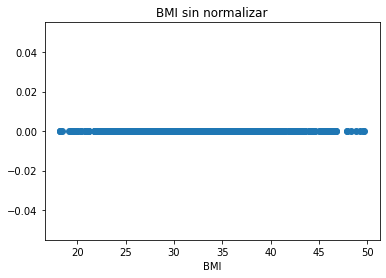

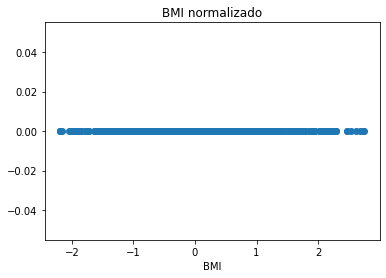

In [ ]:
# A modo de ejemplo, en las siguientes celdas se ha implementado el 2-medias pero considerando otra característica,
# la característica “Presión sanguínea” de las observaciones originales (sin pre-procesamiento)

# Scatter plot sin indicar las clases
df = pd.read_csv('pima_indias_prepro.csv')

X_bmi = df['BMI']

plt.title("BMI sin normalizar")
plt.scatter(X_bmi, 0*X_bmi)
plt.xlabel('BMI')
plt.show()  

scaler = preprocessing.StandardScaler().fit(X_bmi.values.reshape(-1,1))
X_bmi_norm = scaler.transform(X_bmi.values.reshape(-1,1))

plt.title("BMI normalizado")
plt.scatter(X_bmi_norm, 0*X_bmi_norm)
plt.xlabel('BMI')
plt.show()



Coordenadas de los centroides resultantes del algoritmo 2-medias sobre X_bmi: 
[[-0.76999911]
 [ 0.83695556]]
Suma del Error cuadrático: 
273.0585306842661


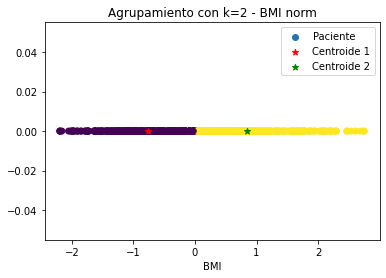

In [ ]:
X_bmi_arr = np.asarray(X_bmi_norm)

kmeans2_bmi_norm = KMeans(n_clusters=2, verbose=0, init='random', random_state=0).fit(X_bmi_arr.reshape(-1,1))
centroids2_bmi_norm = kmeans2_bmi_norm.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 2-medias sobre X_bmi: ')
print(centroids2_bmi_norm)

print('Suma del Error cuadrático: ')
print(kmeans2_bmi_norm.inertia_)


etiquetas2_bmi_norm = kmeans2_bmi_norm.labels_

plt.figure()
plt.scatter(X_bmi_norm,0*X_bmi_norm, c=etiquetas2_bmi_norm, label = 'Paciente')
plt.scatter(centroids2_bmi_norm[0], 0, s = 40, marker= '*', c = 'red', label = 'Centroide 1')
plt.scatter(centroids2_bmi_norm[1], 0, s = 40, marker= '*', c = 'green', label = 'Centroide 2')
plt.legend()
plt.xlabel('BMI')
plt.title('Agrupamiento con k=2 - BMI norm')
plt.show()  

En la gráfica se observa el resultado del clustering. Los colores determinan el cluster al que pertenecen las observaciones. Como k = 2 solo hay dos particiones de los datos.

Se observa una disminución del SSE con respecto al clustering realizado con la variable BMI exclusivamente sin normalizar. Esto es debido a las siguientes razones:

En primer lugar, al hacer uso de la base datos preprocesada, eliminando los outliers y sustituyendo los valores atípicos, la asignación de cada una de las observaciones al cluster más cercano es más adecuada. 

En segundo lugar, en el cálculo de SSE se hace uso de la distancia euclídea y como ahora los rangos se encuentran entre (-2,3) el cálculo de las distancias produce valores más pequeños. 


Para n_clusters = 2 , SOLO CON BMI, el valor medio de la silueta es: 0.5433235901896142


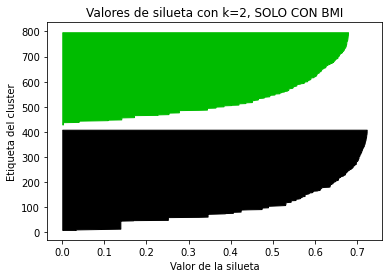

In [ ]:
n_clusters = 2

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X_bmi_arr.reshape(-1,1), etiquetas2_bmi_norm)
print("Para n_clusters =", n_clusters,
              ", SOLO CON BMI, el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values = silhouette_samples(X_bmi_arr.reshape(-1,1), etiquetas2_bmi_norm)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values[etiquetas2_bmi_norm == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=2, SOLO CON BMI')
plt.show() 

El valor promedio no es muy alto, 0.54. Esto indica que hay un equilibrio entre observaciones cercanas a valores de 1 (alta seguridad en la asignación de clusters) y observaciones cercanas a cero (casos dudosos). 

Cabe destacar como el cluster verde no llega a obtener el máximo valor de silueta presente en el cluster negro, lo cual significa que la seguridad de estar bien asignados es menor, aunque ronda el 0.65.

Lo resultados de silueta son muy similares a los obtenidos con BMI sin normalizar. No obstante, incrementa muy ligeramente el valor de silueta medio. 

In [ ]:
# K = 2, con el cluster con sólo una característica

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0



for i in range(len(etiquetas2_bmi_norm)):
    if etiquetas2_bmi_norm[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas2_bmi_norm[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
            
print('_________******____________')
print('Con k=2 y Sólo "BMI" como característica normalizada')
print('_________******____________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)

    

_________******____________
Con k=2 y Sólo "BMI" como característica normalizada
_________******____________
Número de pacientes NO diabéticos en el Cluster 1: 301
Numero de pacientes diabéticos en el Cluster 1: 99
Número de pacientes NO diabéticos en el Cluster 2:  199
Número de pacientes diabéticos en el Cluster 2: 169
___________________________
Número total de pacientes en el Cluster 1: 400
Número total de pacientes en el Cluster 2: 368


In [ ]:
for index, value in enumerate (etiquetas2_bmi_norm):
    if value == 1:
        etiquetas2_bmi_norm[index]=0

In [ ]:
accuracy_2_bmi_norm,recall_2_bmi_norm,f1_2_bmi_norm,specificity_2_bmi_norm = figuras_merito(etiquetas2_bmi_norm,labels)

print("Accuracy con k = 2 - BMI norm", accuracy_2_bmi_norm)
print("Sensibilidad con k = 2 - BMI norm", recall_2_bmi_norm)
print("F1 con k = 2 - BMI norm", f1_2_bmi_norm)
print("Specificity con k = 2 - BMI norm", specificity_2_bmi_norm)

Accuracy con k = 2 - BMI norm 0.6510416666666666
Sensibilidad con k = 2 - BMI norm 0.0
F1 con k = 2 - BMI norm 0.0
Specificity con k = 2 - BMI norm 1.0


In [ ]:
Tabla = pd.DataFrame({ "Prestaciones":["SSE","Silueta","Accuracy","Sensibility", 'Specificity','F1'],
                      "BMI" : ["21437.49","0.537",accuracy_2_bmi,recall_2_bmi,specificity_2_bmi,f1_2_bmi],
                      "BMI norm" : ["273.058","0.543",accuracy_2_bmi_norm,recall_2_bmi_norm,specificity_2_bmi_norm,f1_2_bmi_norm],
                      "BMI-Glucosa" : ["253737.312","0.56",accuracy_2,recall_2,specificity_2,f1_2],
                      "BMI-Glucosa norm" : ["921.669","0.362",accuracy_2_norm,recall_2_norm,specificity_2_norm,f1_2_norm]})
Tabla

,Prestaciones,BMI,BMI norm,BMI-Glucosa,BMI-Glucosa norm
0,SSE,21437.49,273.058,253737.312,921.669
1,Silueta,0.537,0.543,0.56,0.362
2,Accuracy,0.651042,0.651042,0.736979,0.727865
3,Sensibility,0,0,0.58209,0.716418
4,Specificity,1,1,0.82,0.734
5,F1,0,0,0.607004,0.647555


**BMI - BMI norm**

Teniendo en cuenta la evaluación externa, ambos detectan solamente a los no diabéticos obteniendo una especificidad de 1 y una sensibilidad de 0, lo cual tiene sentido al contar con una base de datos desbalanceada. 

En cambio, si se analiza el valor de SSE se observan claras diferencias, obteniendo un valor significativamente inferior con BMI normalizado. Esto es debido a que en el cálculo de SSE se hace uso de la distancia euclídea y como ahora los rangos son más pequeños el cálculo de las distancias produce valores más pequeños.

Por otra parte, el valor medio de silueta es muy similar, obteniendo mejor resultado en BMI normalizado.


**BMI-Glucosa	BMI-Glucosa norm**

Cabe destacar el valor de silueta cuando se normaliza. Esto se debe a que al normalizar se está considerando igual de importante la variable Glucosa que BMI, haciendo que la disposición de los centroides no se encuentre en una zona con muchas observaciones (zona más compacta) porque las observaciones están más dispersas dentro del cluster. No obstante, esta gran diferencia de silueta no se observa en la evaluación externa ya que esta medida no tiene en cuenta la variación intracluster. 

Tras este análisis se puede observar como el valor de SSE es inferior tras normalizar porque se tienen en cuenta valores dentro de un rango inferior, no porque disminuya la distancia intracluster. 


A la vista de esta tabla el modelo más adecuado sería con BMI y Glucosa sin normalizar a nivel general, aunque tras realizar numerosos análisis en anteriores prácticas se obtendrían mejores o iguales resultados si solo se realizara el agrupamiento con la variable Glucosa ya que es la característica más informativa en este estudio. 


Se concluye la necesidad e importancia de evaluar los cluster con más de una figura de mérito.



# 3. Agrupamiento jerárquico aglomerativo

# Entrega

**Continúe considerando las características “índice de masa corporal” y “glucosa” y el conjunto de observaciones preprocesado (tratamiento de valores perdidos).**

**En este tipo de agrupamiento:**

- **consideraremos distancia Euclídea como medida de distancia entre observaciones**
- **para calcular la proximidad entre clusters (linkage), evaluaremos las opciones single, complete, average y centroid (presentadas en la asignatura).**


**Para realizar el agrupamiento, elija una medida de disimilitud y justifique su elección.**
**Implemente el agrupamiento y represente el dendrograma. A la vista del dendrograma, ¿cuántos grupos considera adecuado elegir? Justifique su respuesta.**



**Haga uso de la silueta y evalúe la calidad de los grupos obtenidos si considera 2, 3, 4 y 5 grupos. A la vista del resultado, ¿cuántos grupos considera adecuado elegir? Justifique su respuesta.**


**Compare el valor de silueta obtenido con el agrupamiento jerárquico y con el algoritmo k-medias, comentando y justificando las similitudes/diferencias.**


**Represente el diagrama de dispersión de puntos con las características indicadas y el número de grupos elegido, asignando cada caso a un grupo. Puede hacer uso de un símbolo y/o un color diferente para representar la asignación de un caso a un grupo.**


**Considere ahora la variable binaria “Outcome” asociada a cada caso, variable que identifica la clase a la que pertenece cada caso. Haciendo uso del número de grupos elegido y una vez construidos los grupos, proporcione las figuras de mérito de la función que implementó en el apartado anterior.  Justifique los resultados y extraiga conclusiones.**



**Disculta la influencia de la normalización de características.**


## Evaluación de linkage

### Complete-link

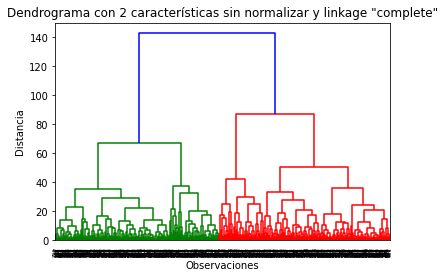

In [ ]:
# En las siguientes celdas se presentan algunos comandos y ejemplos para facilitar la realización de este apartado
df = pd.read_csv('pima_indias_prepro.csv')
X = df[['BMI','Glucose']] 


import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))


plt.title('Dendrograma con 2 características sin normalizar y linkage "complete"')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

Teniendo en cuenta complete-link como criterio de disimilitud, el agrupamiento más adecuado se daria con k = 2

### Single-link

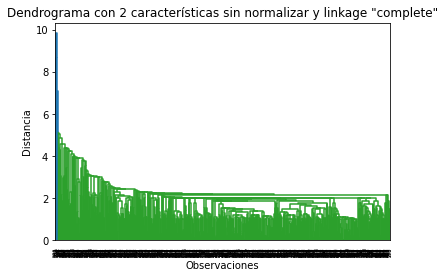

In [ ]:
# En las siguientes celdas se presentan algunos comandos y ejemplos para facilitar la realización de este apartado

dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))


plt.title('Dendrograma con 2 características sin normalizar y linkage "single"')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

Teniendo en cuenta single-link como criterio de disimilitud, no está claro el agrupamiento más adecuado

### Average

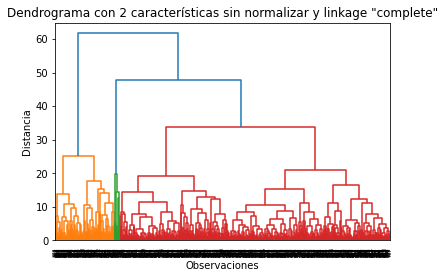

In [ ]:
# En las siguientes celdas se presentan algunos comandos y ejemplos para facilitar la realización de este apartado

dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))


plt.title('Dendrograma con 2 características sin normalizar y linkage "average"')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

Teniendo en cuenta average como criterio de disimilitud, el agrupamiento más adecuado se daria con k = 4.

### Centroid

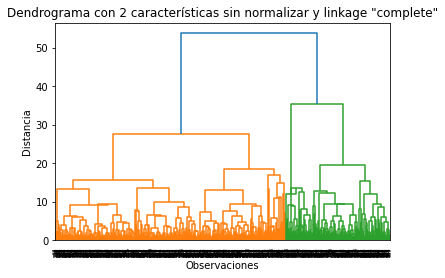

In [ ]:
# En las siguientes celdas se presentan algunos comandos y ejemplos para facilitar la realización de este apartado

dendrogram = sch.dendrogram(sch.linkage(X, method = 'centroid'))


plt.title('Dendrograma con 2 características sin normalizar y linkage "centroids"')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

Teniendo en cuenta centroids como criterio de disimilitud, el agrupamiento más adecuado se daria con k = 2.

Tras realizar los distintos dendrogramas, el criterio de disimilitud más adecuado es complete-link o centroids ya que como se ha observado anteriormente con un k = 2 es con el que mayor valor de silueta se ha obtenido. 

Se decide complete-link ya que es el que diferencia más los dos clusters, al utilizar la máxima distancia intercluster. 

## Sin normalizar

### 2 grupos

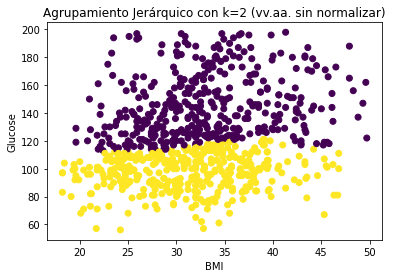

In [ ]:
# Agrupamiento jerárquico aglomerativo

from sklearn.cluster import AgglomerativeClustering

X_BMI = df['BMI']
X_Glucose = df['Glucose']

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
hc.fit(X)
etiquetas2_hc = hc.labels_

   
plt.figure()
plt.scatter(X_BMI, X_Glucose, c=etiquetas2_hc, label = 'Paciente')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento Jerárquico con k=2 (vv.aa. sin normalizar)')
plt.show()  



Para AGRUP JERARQUICO con n_clusters = 2 , el valor medio de la silueta es: 0.48138028429258267


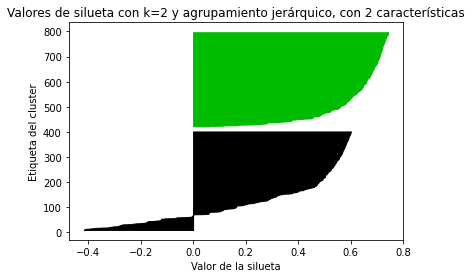

In [ ]:
n_clusters = 2


silhouette_avg_norm = silhouette_score(X, etiquetas2_hc)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X, etiquetas2_hc)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[etiquetas2_hc == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=2 y agrupamiento jerárquico, con 2 características')
plt.show() 

In [ ]:
# K = 2, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0



for i in range(len(etiquetas2_hc)):
    if etiquetas2_hc[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas2_hc[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
            
print('__________________________******______________________________')
print('Con k=2 (JERARQUICO y BMI y Glucosa  como características sin stand')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)   

__________________________******______________________________
Con k=2 (JERARQUICO y BMI y Glucosa  como características sin stand
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 186
Numero de pacientes diabéticos en el Cluster 1: 207
Número de pacientes NO diabéticos en el Cluster 2:  314
Número de pacientes diabéticos en el Cluster 2: 61
___________________________
Número total de pacientes en el Cluster 1: 393
Número total de pacientes en el Cluster 2: 375


In [ ]:
for index, value in enumerate (etiquetas2_hc):
    if value == 0:
        etiquetas2_hc[index]=1
    if value == 1:
        etiquetas2_hc[index]=0

In [ ]:
accuracy_2_hc,recall_2_hc,f1_2_hc,specificity_2_hc = figuras_merito(etiquetas2_hc,labels)

print("Accuracy con k = 2 ", accuracy_2_hc)
print("Sensibilidad con k = 2 ", recall_2_hc)
print("F1 con k = 2 ", f1_2_hc)
print("Specificity con k = 2 ", specificity_2_hc)

Accuracy con k = 2  0.6783854166666666
Sensibilidad con k = 2  0.7723880597014925
F1 con k = 2  0.6263237518910741
Specificity con k = 2  0.628


### 3 grupos

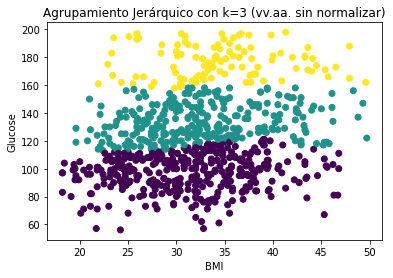

In [ ]:
# Agrupamiento jerárquico aglomerativo

from sklearn.cluster import AgglomerativeClustering

X_BMI = df['BMI']
X_Glucose = df['Glucose']

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
hc.fit(X)
etiquetas3_hc = hc.labels_

   
plt.figure()
plt.scatter(X_BMI, X_Glucose, c=etiquetas3_hc, label = 'Paciente')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento Jerárquico con k=3 (vv.aa. sin normalizar)')
plt.show()  



Para AGRUP JERARQUICO con n_clusters = 3 , el valor medio de la silueta es: 0.4726399289483402


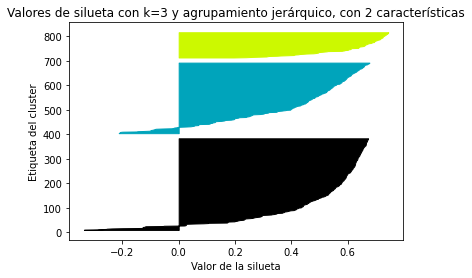

In [ ]:
n_clusters = 3


silhouette_avg_norm = silhouette_score(X, etiquetas3_hc)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X, etiquetas3_hc)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[etiquetas3_hc == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=3 y agrupamiento jerárquico, con 2 características')
plt.show() 

In [ ]:
# K = 3, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0

for i in range(len(etiquetas3_hc)):
    if etiquetas3_hc[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas3_hc[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas3_hc[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
print('__________________________******______________________________')
print('Con k=3 (JERARQUICO y BMI y Glucosa  como características sin stand')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3: ',no_diab3)
print('Número de pacientes diabéticos en el Cluster 3:',diab3)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2) 
print('Número total de pacientes en el Cluster 3:',cluster3)

__________________________******______________________________
Con k=3 (JERARQUICO y BMI y Glucosa  como características sin stand
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 314
Numero de pacientes diabéticos en el Cluster 1: 61
Número de pacientes NO diabéticos en el Cluster 2:  166
Número de pacientes diabéticos en el Cluster 2: 123
Número de pacientes NO diabéticos en el Cluster 3:  20
Número de pacientes diabéticos en el Cluster 3: 84
___________________________
Número total de pacientes en el Cluster 1: 375
Número total de pacientes en el Cluster 2: 289
Número total de pacientes en el Cluster 3: 104


In [ ]:
for index, value in enumerate (etiquetas3_hc):
    if value == 1:
        etiquetas3_hc[index]=0
    if value == 2:
        etiquetas3_hc[index]=1


In [ ]:
accuracy_3_hc,recall_3_hc,f1_3_hc,specificity_3_hc = figuras_merito(etiquetas3_hc,labels)

print("Accuracy con k = 3", accuracy_3_hc)
print("Sensibilidad con k = 3 ", recall_3_hc)
print("F1 con k = 3 ", f1_3_hc)
print("Specificity con k = 3 ", specificity_3_hc)

Accuracy con k = 3 0.734375
Sensibilidad con k = 3  0.31343283582089554
F1 con k = 3  0.4516129032258065
Specificity con k = 3  0.96


### 4 grupos

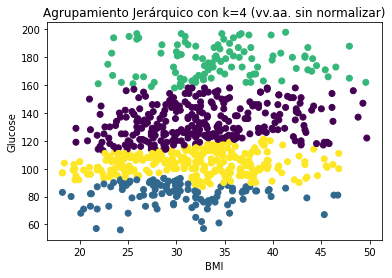

In [ ]:
# Agrupamiento jerárquico aglomerativo

from sklearn.cluster import AgglomerativeClustering

X_BMI = df['BMI']
X_Glucose = df['Glucose']

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
hc.fit(X)
etiquetas4_hc = hc.labels_

   
plt.figure()
plt.scatter(X_BMI, X_Glucose, c=etiquetas4_hc, label = 'Paciente')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento Jerárquico con k=4 (vv.aa. sin normalizar)')
plt.show()  



Para AGRUP JERARQUICO con n_clusters = 4 , el valor medio de la silueta es: 0.3932860859774769


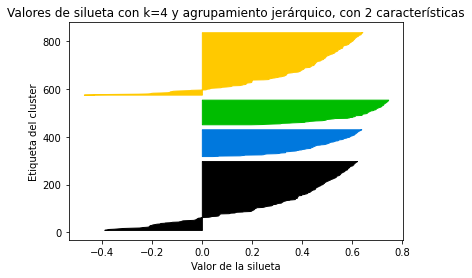

In [ ]:
n_clusters = 4


silhouette_avg_norm = silhouette_score(X, etiquetas4_hc)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X, etiquetas4_hc)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[etiquetas4_hc == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=4 y agrupamiento jerárquico, con 2 características')
plt.show() 

In [ ]:
# K = 4, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0

cluster4=0
diab4 = 0
no_diab4 = 0

for i in range(len(etiquetas4_hc)):
    if etiquetas4_hc[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas4_hc[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas4_hc[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
    if etiquetas4_hc[i]==3:
        cluster4+=1
        if labels[i]==0:
            no_diab4+=1
        else:
            diab4+=1
            
print('__________________________******______________________________')
print('Con k=2 (JERARQUICO y BMI y Glucosa  como características sin stand')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3:',no_diab3)
print('Numero de pacientes diabéticos en el Cluster 3:',diab3)
print('Número de pacientes NO diabéticos en el Cluster 4: ',no_diab4)
print('Número de pacientes diabéticos en el Cluster 4:',diab4)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2) 
print('Número total de pacientes en el Cluster 3:',cluster3)
print('Número total de pacientes en el Cluster 4:',cluster4) 

__________________________******______________________________
Con k=2 (JERARQUICO y BMI y Glucosa  como características sin stand
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 166
Numero de pacientes diabéticos en el Cluster 1: 123
Número de pacientes NO diabéticos en el Cluster 2:  108
Número de pacientes diabéticos en el Cluster 2: 5
Número de pacientes NO diabéticos en el Cluster 3: 20
Numero de pacientes diabéticos en el Cluster 3: 84
Número de pacientes NO diabéticos en el Cluster 4:  206
Número de pacientes diabéticos en el Cluster 4: 56
___________________________
Número total de pacientes en el Cluster 1: 289
Número total de pacientes en el Cluster 2: 113
Número total de pacientes en el Cluster 3: 104
Número total de pacientes en el Cluster 4: 262


In [ ]:
for index, value in enumerate (etiquetas4_hc):
    if value == 1:
        etiquetas4_hc[index]=0
    if value == 2:
        etiquetas4_hc[index]=1
    if value == 3:
        etiquetas4_hc[index]=0


In [ ]:
accuracy_4_hc,recall_4_hc,f1_4_hc,specificity_4_hc = figuras_merito(etiquetas4_hc,labels)

print("Accuracy con k = 4", accuracy_4_hc)
print("Sensibilidad con k = 4 ", recall_4_hc)
print("F1 con k = 4 ", f1_4_hc)
print("Specificity con k = 4 ", specificity_4_hc)

Accuracy con k = 4 0.734375
Sensibilidad con k = 4  0.31343283582089554
F1 con k = 4  0.4516129032258065
Specificity con k = 4  0.96


### 5 grupos

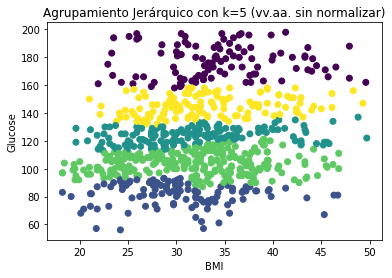

In [ ]:
# Agrupamiento jerárquico aglomerativo

from sklearn.cluster import AgglomerativeClustering

X_BMI = df['BMI']
X_Glucose = df['Glucose']

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
hc.fit(X)
etiquetas5_hc = hc.labels_

   
plt.figure()
plt.scatter(X_BMI, X_Glucose, c=etiquetas5_hc, label = 'Paciente')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento Jerárquico con k=5 (vv.aa. sin normalizar)')
plt.show()  



Para AGRUP JERARQUICO con n_clusters = 5 , el valor medio de la silueta es: 0.3677381221060411


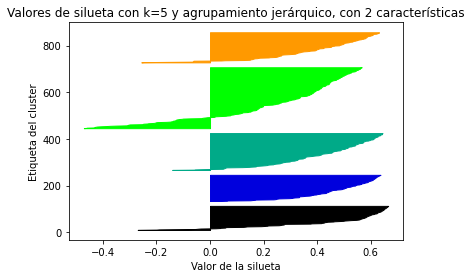

In [ ]:
n_clusters = 5


silhouette_avg_norm = silhouette_score(X, etiquetas5_hc)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X, etiquetas5_hc)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[etiquetas5_hc == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=5 y agrupamiento jerárquico, con 2 características')
plt.show() 

In [ ]:
# K = 5, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0


cluster4=0
diab4 = 0
no_diab4 = 0

cluster5=0
diab5 = 0
no_diab5 = 0



for i in range(len(etiquetas5_hc)):
    if etiquetas5_hc[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas5_hc[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas5_hc[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
    if etiquetas5_hc[i]==3:
        cluster4+=1
        if labels[i]==0:
            no_diab4+=1
        else:
            diab4+=1
    if etiquetas5_hc[i]==4:
        cluster5+=1
        if labels[i]==0:
            no_diab5+=1
        else:
            diab5+=1
            
print('__________________________******______________________________')
print('Con k=5 (JERARQUICO y BMI y Glucosa  como características sin stand')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3:',no_diab3)
print('Numero de pacientes diabéticos en el Cluster 3:',diab3)
print('Número de pacientes NO diabéticos en el Cluster 4: ',no_diab4)
print('Número de pacientes diabéticos en el Cluster 4:',diab4)
print('Número de pacientes NO diabéticos en el Cluster 5: ',no_diab5)
print('Número de pacientes diabéticos en el Cluster 5:',diab5)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)  
print('Número total de pacientes en el Cluster 3:',cluster3)
print('Número total de pacientes en el Cluster 4:',cluster4) 
print('Número total de pacientes en el Cluster 5:',cluster5)

__________________________******______________________________
Con k=5 (JERARQUICO y BMI y Glucosa  como características sin stand
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 20
Numero de pacientes diabéticos en el Cluster 1: 84
Número de pacientes NO diabéticos en el Cluster 2:  108
Número de pacientes diabéticos en el Cluster 2: 5
Número de pacientes NO diabéticos en el Cluster 3: 100
Numero de pacientes diabéticos en el Cluster 3: 59
Número de pacientes NO diabéticos en el Cluster 4:  206
Número de pacientes diabéticos en el Cluster 4: 56
Número de pacientes NO diabéticos en el Cluster 5:  66
Número de pacientes diabéticos en el Cluster 5: 64
___________________________
Número total de pacientes en el Cluster 1: 104
Número total de pacientes en el Cluster 2: 113
Número total de pacientes en el Cluster 3: 159
Número total de pacientes en el Cluster 4: 262
Número total de pacientes en el Cluster 5: 130


In [ ]:
for index, value in enumerate (etiquetas5_hc):
    if value == 0:
        etiquetas5_hc[index]=1
    if value == 1:
        etiquetas5_hc[index]=0
    if value == 2:
        etiquetas5_hc[index]=0
    if value == 3:
        etiquetas5_hc[index]=0
    if value == 4:
        etiquetas5_hc[index]=0

In [ ]:
accuracy_5_hc,recall_5_hc,f1_5_hc,specificity_5_hc = figuras_merito(etiquetas5_hc,labels)

print("Accuracy con k = 5", accuracy_5_hc)
print("Sensibilidad con k = 5 ", recall_5_hc)
print("F1 con k = 5 ", f1_5_hc)
print("Specificity con k = 5 ", specificity_5_hc)

Accuracy con k = 5 0.734375
Sensibilidad con k = 5  0.31343283582089554
F1 con k = 5  0.4516129032258065
Specificity con k = 5  0.96


In [ ]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy","Sensibility", 'Specificity','F1',"silueta"],
                      "k = 2" : [accuracy_2_hc,recall_2_hc,specificity_2_hc,f1_2_hc,"0.4814"],
                      "k = 3" : [accuracy_3_hc,recall_3_hc,specificity_3_hc,f1_3_hc,"0.4726"],
                      "k = 4" : [accuracy_4_hc,recall_4_hc,specificity_4_hc,f1_4_hc,"0.3933"],
                      "k = 5" : [accuracy_5_hc,recall_5_hc,specificity_5_hc,f1_5_hc,"0.3677"]})
Tabla

,Prestaciones,k = 2,k = 3,k = 4,k = 5
0,Accuracy,0.678385,0.734375,0.734375,0.734375
1,Sensibility,0.772388,0.313433,0.313433,0.313433
2,Specificity,0.628,0.96,0.96,0.96
3,F1,0.626324,0.451613,0.451613,0.451613
4,silueta,0.4814,0.4726,0.3933,0.3677


A la vista de la evaluación externa con valores de k igual a 3, 4, 5 se obtienen prestaciones iguales, tanto para accuracy, sensibilidad, especificidad, como f1-score, detectando mejor los no diabéticos por su alta especificidad. En cambio con k=2 se detectan mejor los diabéticos, aunque su especificidad no es tan baja, ronda el 0.63, como en el caso de los k altos y la sensibilidad (0.3). Por tanto, dependiendo del objetivo se elegirá uno u otro. 

Si nos centramos en una evaluación puramente no supervisada con k = 2 es con el que se obtiene el mejor valor de silueta, indicando la agrupación más adecuada en comparación con el resto. No obstante, un valor de 0.4814 es muy bajo, obteniendo mejor valor mediante un agrupamiento particional. 

En cuanto a la evaluación externa se obtienen valores muy similares tanto en un agrupamiento particional como en el jerárquico en el caso del accuracy. El resto de figuras de mérito fluctúan bastante, siendo mejor en algunos casos en un jerárquico y en otros el particional.

## Normalizando

### 2 grupos

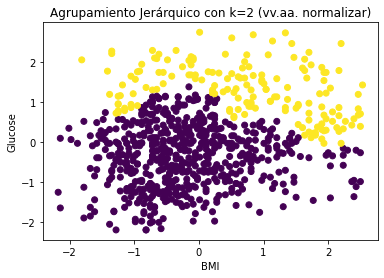

In [ ]:
# Agrupamiento jerárquico aglomerativo

from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

X_BMI = df['BMI']
X_Glucose = df['Glucose']

scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)

X_Glucose_norm = X_norm[:,0];
X_BMI_norm =  X_norm[:,1];

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
hc.fit(X_norm)
etiquetas2_hc_norm = hc.labels_



   
plt.figure()
plt.scatter(X_BMI_norm, X_Glucose_norm, c=etiquetas2_hc_norm, label = 'Paciente')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento Jerárquico con k=2 (vv.aa. normalizar)')
plt.show()  



Para AGRUP JERARQUICO con n_clusters = 2 , el valor medio de la silueta es: 0.3540447507965303


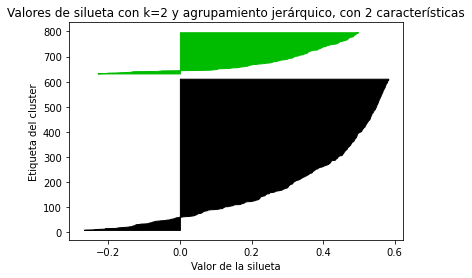

In [ ]:
n_clusters = 2


silhouette_avg_norm = silhouette_score(X_norm, etiquetas2_hc_norm)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X_norm, etiquetas2_hc_norm)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[etiquetas2_hc_norm == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=2 y agrupamiento jerárquico, con 2 características')
plt.show() 

In [ ]:
# K = 2, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0



for i in range(len(etiquetas2_hc_norm)):
    if etiquetas2_hc_norm[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas2_hc_norm[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
            
print('__________________________******______________________________')
print('Con k=2 (JERARQUICO y BMI y Glucosa  como características sin stand')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)   

__________________________******______________________________
Con k=2 (JERARQUICO y BMI y Glucosa  como características sin stand
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 438
Numero de pacientes diabéticos en el Cluster 1: 165
Número de pacientes NO diabéticos en el Cluster 2:  62
Número de pacientes diabéticos en el Cluster 2: 103
___________________________
Número total de pacientes en el Cluster 1: 603
Número total de pacientes en el Cluster 2: 165


In [ ]:
accuracy_2_hc_norm,recall_2_hc_norm,f1_2_hc_norm,specificity_2_hc_norm = figuras_merito(etiquetas2_hc_norm,labels)

print("Accuracy con k = 2 ", accuracy_2_hc_norm)
print("Sensibilidad con k = 2 ", recall_2_hc_norm)
print("F1 con k = 2 ", f1_2_hc_norm)
print("Specificity con k = 2 ", specificity_2_hc_norm)

Accuracy con k = 2  0.7044270833333334
Sensibilidad con k = 2  0.3843283582089552
F1 con k = 2  0.47575057736720555
Specificity con k = 2  0.876


### 3 grupos

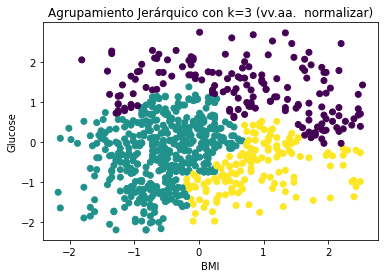

In [ ]:
# Agrupamiento jerárquico aglomerativo

from sklearn.cluster import AgglomerativeClustering



hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
hc.fit(X_norm)
etiquetas3_hc_norm = hc.labels_

   
plt.figure()
plt.scatter(X_BMI_norm, X_Glucose_norm, c=etiquetas3_hc_norm, label = 'Paciente')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento Jerárquico con k=3 (vv.aa.  normalizar)')
plt.show()  



Para AGRUP JERARQUICO con n_clusters = 3 , el valor medio de la silueta es: 0.2727040183785634


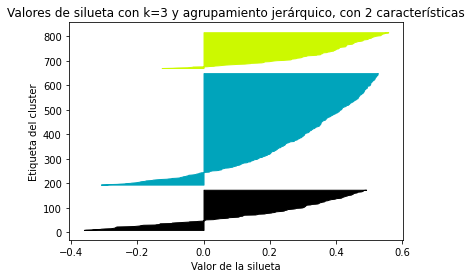

In [ ]:
n_clusters = 3


silhouette_avg_norm = silhouette_score(X_norm, etiquetas3_hc_norm)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X_norm, etiquetas3_hc_norm)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[etiquetas3_hc_norm == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=3 y agrupamiento jerárquico, con 2 características')
plt.show() 

In [ ]:
# K = 3, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0

for i in range(len(etiquetas3_hc_norm)):
    if etiquetas3_hc_norm[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas3_hc_norm[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas3_hc_norm[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
print('__________________________******______________________________')
print('Con k=3 (JERARQUICO y BMI y Glucosa  como características sin stand')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3: ',no_diab3)
print('Número de pacientes diabéticos en el Cluster 3:',diab3)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2) 
print('Número total de pacientes en el Cluster 3:',cluster3)

__________________________******______________________________
Con k=3 (JERARQUICO y BMI y Glucosa  como características sin stand
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 62
Numero de pacientes diabéticos en el Cluster 1: 103
Número de pacientes NO diabéticos en el Cluster 2:  354
Número de pacientes diabéticos en el Cluster 2: 102
Número de pacientes NO diabéticos en el Cluster 3:  84
Número de pacientes diabéticos en el Cluster 3: 63
___________________________
Número total de pacientes en el Cluster 1: 165
Número total de pacientes en el Cluster 2: 456
Número total de pacientes en el Cluster 3: 147


In [ ]:
for index, value in enumerate (etiquetas3_hc_norm):
    if value == 0:
        etiquetas3_hc_norm[index]=1
    if value == 1:
        etiquetas3_hc_norm[index]=0
    if value == 2:
        etiquetas3_hc_norm[index]=0


In [ ]:
accuracy_3_hc_norm,recall_3_hc_norm,f1_3_hc_norm,specificity_3_hc_norm = figuras_merito(etiquetas3_hc_norm,labels)

print("Accuracy con k = 3", accuracy_3_hc_norm)
print("Sensibilidad con k = 3 ", recall_3_hc_norm)
print("F1 con k = 3 ", f1_3_hc_norm)
print("Specificity con k = 3 ", specificity_3_hc_norm)

Accuracy con k = 3 0.7044270833333334
Sensibilidad con k = 3  0.3843283582089552
F1 con k = 3  0.47575057736720555
Specificity con k = 3  0.876


### 4 grupos

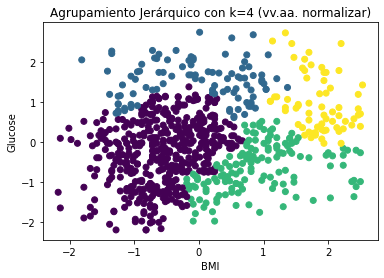

In [ ]:
# Agrupamiento jerárquico aglomerativo

from sklearn.cluster import AgglomerativeClustering

X_BMI = df['BMI']
X_Glucose = df['Glucose']

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
hc.fit(X_norm)
etiquetas4_hc_norm = hc.labels_

   
plt.figure()
plt.scatter(X_BMI_norm, X_Glucose_norm, c=etiquetas4_hc_norm, label = 'Paciente')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento Jerárquico con k=4 (vv.aa. normalizar)')
plt.show()  



Para AGRUP JERARQUICO con n_clusters = 4 , el valor medio de la silueta es: 0.2545166591333708


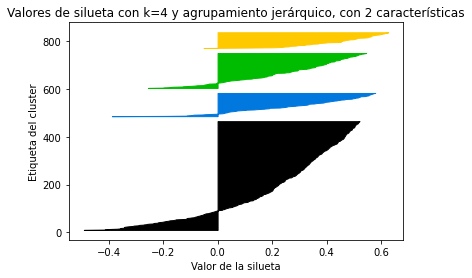

In [ ]:
n_clusters = 4


silhouette_avg_norm = silhouette_score(X_norm, etiquetas4_hc_norm)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X_norm, etiquetas4_hc_norm)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[etiquetas4_hc_norm == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=4 y agrupamiento jerárquico, con 2 características')
plt.show() 

In [ ]:
# K = 4, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0

cluster4=0
diab4 = 0
no_diab4 = 0

for i in range(len(etiquetas4_hc_norm)):
    if etiquetas4_hc_norm[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas4_hc_norm[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas4_hc_norm[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
    if etiquetas4_hc_norm[i]==3:
        cluster4+=1
        if labels[i]==0:
            no_diab4+=1
        else:
            diab4+=1
            
print('__________________________******______________________________')
print('Con k=2 (JERARQUICO y BMI y Glucosa  como características ')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3:',no_diab3)
print('Numero de pacientes diabéticos en el Cluster 3:',diab3)
print('Número de pacientes NO diabéticos en el Cluster 4: ',no_diab4)
print('Número de pacientes diabéticos en el Cluster 4:',diab4)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2) 
print('Número total de pacientes en el Cluster 3:',cluster3)
print('Número total de pacientes en el Cluster 4:',cluster4) 

__________________________******______________________________
Con k=2 (JERARQUICO y BMI y Glucosa  como características 
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 354
Numero de pacientes diabéticos en el Cluster 1: 102
Número de pacientes NO diabéticos en el Cluster 2:  53
Número de pacientes diabéticos en el Cluster 2: 45
Número de pacientes NO diabéticos en el Cluster 3: 84
Numero de pacientes diabéticos en el Cluster 3: 63
Número de pacientes NO diabéticos en el Cluster 4:  9
Número de pacientes diabéticos en el Cluster 4: 58
___________________________
Número total de pacientes en el Cluster 1: 456
Número total de pacientes en el Cluster 2: 98
Número total de pacientes en el Cluster 3: 147
Número total de pacientes en el Cluster 4: 67


In [ ]:
for index, value in enumerate (etiquetas4_hc_norm):
    if value == 1:
        etiquetas4_hc_norm[index]=0
    if value == 2:
        etiquetas4_hc_norm[index]=0
    if value == 3:
        etiquetas4_hc_norm[index]=1


In [ ]:
accuracy_4_hc_norm,recall_4_hc_norm,f1_4_hc_norm,specificity_4_hc_norm = figuras_merito(etiquetas4_hc_norm,labels)

print("Accuracy con k = 4", accuracy_4_hc_norm)
print("Sensibilidad con k = 4 ", recall_4_hc_norm)
print("F1 con k = 4 ", f1_4_hc_norm)
print("Specificity con k = 4 ", specificity_4_hc_norm)

Accuracy con k = 4 0.71484375
Sensibilidad con k = 4  0.21641791044776118
F1 con k = 4  0.3462686567164179
Specificity con k = 4  0.982


### 5 grupos

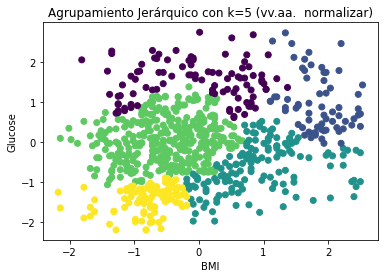

In [ ]:
# Agrupamiento jerárquico aglomerativo

from sklearn.cluster import AgglomerativeClustering

X_BMI = df['BMI']
X_Glucose = df['Glucose']

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
hc.fit(X_norm)
etiquetas5_hc_norm = hc.labels_

   
plt.figure()
plt.scatter(X_BMI_norm, X_Glucose_norm, c=etiquetas5_hc_norm, label = 'Paciente')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Agrupamiento Jerárquico con k=5 (vv.aa.  normalizar)')
plt.show()  



Para AGRUP JERARQUICO con n_clusters = 5 , el valor medio de la silueta es: 0.2588845488851052


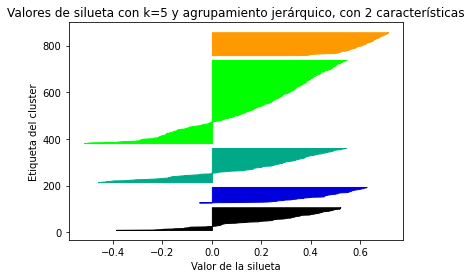

In [ ]:
n_clusters = 5


silhouette_avg_norm = silhouette_score(X_norm, etiquetas5_hc_norm)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X_norm, etiquetas5_hc_norm)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[etiquetas5_hc_norm == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=5 y agrupamiento jerárquico, con 2 características')
plt.show() 

In [ ]:
# K = 5, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0


cluster4=0
diab4 = 0
no_diab4 = 0

cluster5=0
diab5 = 0
no_diab5 = 0



for i in range(len(etiquetas5_hc_norm)):
    if etiquetas5_hc_norm[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas5_hc_norm[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas5_hc_norm[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
    if etiquetas5_hc_norm[i]==3:
        cluster4+=1
        if labels[i]==0:
            no_diab4+=1
        else:
            diab4+=1
    if etiquetas5_hc_norm[i]==4:
        cluster5+=1
        if labels[i]==0:
            no_diab5+=1
        else:
            diab5+=1
            
print('__________________________******______________________________')
print('Con k=5 (JERARQUICO y BMI y Glucosa  como características sin stand')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3:',no_diab3)
print('Numero de pacientes diabéticos en el Cluster 3:',diab3)
print('Número de pacientes NO diabéticos en el Cluster 4: ',no_diab4)
print('Número de pacientes diabéticos en el Cluster 4:',diab4)
print('Número de pacientes NO diabéticos en el Cluster 5: ',no_diab5)
print('Número de pacientes diabéticos en el Cluster 5:',diab5)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)  
print('Número total de pacientes en el Cluster 3:',cluster3)
print('Número total de pacientes en el Cluster 4:',cluster4) 
print('Número total de pacientes en el Cluster 5:',cluster5)

__________________________******______________________________
Con k=5 (JERARQUICO y BMI y Glucosa  como características sin stand
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 53
Numero de pacientes diabéticos en el Cluster 1: 45
Número de pacientes NO diabéticos en el Cluster 2:  9
Número de pacientes diabéticos en el Cluster 2: 58
Número de pacientes NO diabéticos en el Cluster 3: 84
Numero de pacientes diabéticos en el Cluster 3: 63
Número de pacientes NO diabéticos en el Cluster 4:  257
Número de pacientes diabéticos en el Cluster 4: 100
Número de pacientes NO diabéticos en el Cluster 5:  97
Número de pacientes diabéticos en el Cluster 5: 2
___________________________
Número total de pacientes en el Cluster 1: 98
Número total de pacientes en el Cluster 2: 67
Número total de pacientes en el Cluster 3: 147
Número total de pacientes en el Cluster 4: 357
Número total de pacientes en el Cluster 5: 99


In [ ]:
for index, value in enumerate (etiquetas5_hc_norm):
    if value == 2:
        etiquetas5_hc_norm[index]=0
    if value == 3:
        etiquetas5_hc_norm[index]=0
    if value == 4:
        etiquetas5_hc_norm[index]=0

In [ ]:
accuracy_5_hc_norm,recall_5_hc_norm,f1_5_hc_norm,specificity_5_hc_norm = figuras_merito(etiquetas5_hc_norm,labels)

print("Accuracy con k = 5", accuracy_5_hc_norm)
print("Sensibilidad con k = 5 ", recall_5_hc_norm)
print("F1 con k = 5 ", f1_5_hc_norm)
print("Specificity con k = 5 ", specificity_5_hc_norm)

Accuracy con k = 5 0.71484375
Sensibilidad con k = 5  0.21641791044776118
F1 con k = 5  0.3462686567164179
Specificity con k = 5  0.982


In [ ]:
Tabla = pd.DataFrame({ "Prestaciones NORM":["Accuracy","Sensibility", 'Specificity','F1',"silueta"],
                      "k = 2" : [accuracy_2_hc_norm,recall_2_hc_norm,specificity_2_hc_norm,f1_2_hc,"0.354"],
                      "k = 3" : [accuracy_3_hc_norm,recall_3_hc_norm,specificity_3_hc_norm,f1_3_hc,"0.273"],
                      "k = 4" : [accuracy_4_hc_norm,recall_4_hc_norm,specificity_4_hc_norm,f1_4_hc,"0.255"],
                      "k = 5" : [accuracy_5_hc_norm,recall_5_hc_norm,specificity_5_hc_norm,f1_5_hc,"0.259"]})
Tabla

,Prestaciones NORM,k = 2,k = 3,k = 4,k = 5
0,Accuracy,0.704427,0.704427,0.714844,0.714844
1,Sensibility,0.384328,0.384328,0.216418,0.216418
2,Specificity,0.876,0.876,0.982,0.982
3,F1,0.626324,0.451613,0.451613,0.451613
4,silueta,0.354,0.273,0.255,0.259


In [ ]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy","Sensibility", 'Specificity','F1',"silueta"],
                      "k = 2" : [accuracy_2_hc,recall_2_hc,specificity_2_hc,f1_2_hc,"0.4814"],
                      "k = 3" : [accuracy_3_hc,recall_3_hc,specificity_3_hc,f1_3_hc,"0.4726"],
                      "k = 4" : [accuracy_4_hc,recall_4_hc,specificity_4_hc,f1_4_hc,"0.3933"],
                      "k = 5" : [accuracy_5_hc,recall_5_hc,specificity_5_hc,f1_5_hc,"0.3677"]})
Tabla

,Prestaciones,k = 2,k = 3,k = 4,k = 5
0,Accuracy,0.678385,0.734375,0.734375,0.734375
1,Sensibility,0.772388,0.313433,0.313433,0.313433
2,Specificity,0.628,0.96,0.96,0.96
3,F1,0.626324,0.451613,0.451613,0.451613
4,silueta,0.4814,0.4726,0.3933,0.3677


El valor de silueta disminuye cuando se normalizan las características por las mismas razones comentadas en el apartado 2. Las observaciones dentro del cluster se encuentran más dispersas en el caso de la normalización. 

Los valores de las figuras de mérito en una evaluación externa de accuracy y F1 son parecidos con o sin normalizar. En cambio, tras normalizar el valor de sensibilidad disminuye significativamente en el caso de k bajos y en k altos disminuye ligeramente debido a que al considerar de igual forma BMI que Glucosa ya no cosigue distinguir tan bien a los diabéticos de los no diabéticos. Por otra parte, la especificidad aumenta en k bajos tras normalizar. 

# Entrega

**A la vista de los resultados obtenidos en los apartados anteriores, justifique razonadamente (de manera clara y consisa) qué esquema de agrupamiento, de los dos considerados, elegiría.**

Si nos centramos en una evaluación puramente no supervisada un agrupamiento particional es el que mejor valor de silueta obtiene. 

En cuanto a la evaluación externa se obtienen unos valores muy similares tanto en un agrupamiento particional como en el jerárquico en el caso del accuracy. El resto de figuras de mérito fluctuan bastante, siendo mejor en algunos casos en un jeráquico y en otros el particional.

Por tanto, en función del objetivo final se optará por un método u otro. 

El esquema de agrupamiento elegido es el particional ya que tiene un mejor valor de silueta y parecidas figuras de mérito.


# 4. Agrupamiento sobre un espacio transformado 

**El estudiante debe trabajar con el fichero resultante del tratamiento de valores perdidos.**


**En las siguientes celdas del fichero proporcionado en la práctica se muestran los diagramas de dispersión etiquetados para varios pares de componentes principales (CP). Elija dos de estas combinaciones de pares de CP y aplique el esquema de agrupamiento elegido en la sección anterior. Explore distintos valores para el número de grupos (clusters) y elija el más adecuado. Explique el procedimiento seguido para realizar esa elección.**



In [ ]:
# Leemos el fichero de observaciones y estandarizamos las características de entrada
from sklearn import preprocessing

pima_indians_df = pd.read_csv('pima_indias_prepro.csv')
array = pima_indians_df.values

# Separamos la características de entrada al modelo (8 primeras) y de salida (1 variable) 
X_all = array[:,0:8]
Y_all = array[:,8]


# Normalizamos cada característica
scaler = preprocessing.StandardScaler().fit(X_all)
X_all_norm = scaler.transform(X_all)

print(X_all_norm.shape)


(768, 8)


Varianza explicada: [0.28440308 0.1764368  0.14057326 0.12018058 0.0996057  0.07372337
 0.05492205 0.05015516]
0.9999999999999999


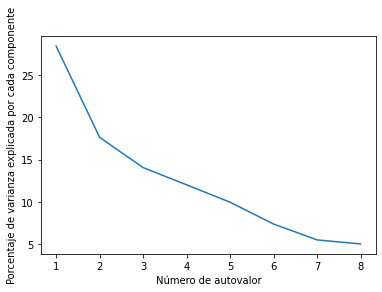

In [ ]:
from sklearn.decomposition import PCA

n_componentes_pca= 8
index_autov = range(1,n_componentes_pca+1)
pca = PCA(n_components=n_componentes_pca)
fit = pca.fit(X_all_norm)

print("Varianza explicada: %s" % fit.explained_variance_ratio_)
print(sum(fit.explained_variance_ratio_))

Porc_var_expl = fit.explained_variance_ratio_/sum(fit.explained_variance_ratio_)*100



    
plt.plot(index_autov, Porc_var_expl)
plt.xlabel('Número de autovalor')
plt.ylabel('Porcentaje de varianza explicada por cada componente')
plt.show()



In [ ]:
# Hacemos PCA y extraemos todas las CP

pca = PCA(n_components=8)
X_all_norm_pca = pca.fit_transform(X_all_norm)

print(X_all_norm_pca.shape)


(768, 8)


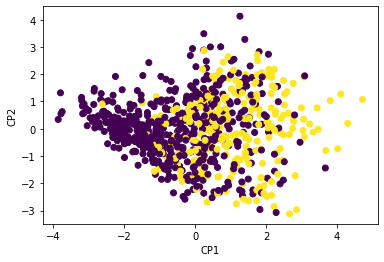

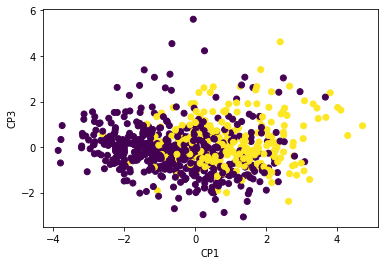

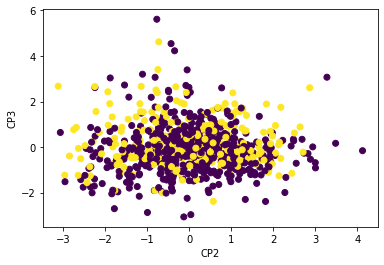

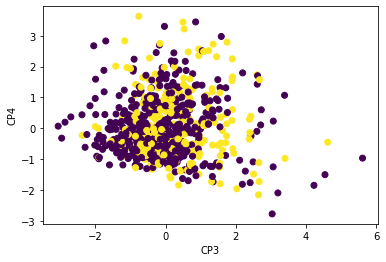

In [ ]:
# Coger las componentes transformadas 1 y 2
# Coger las componentes transformadas 1 y 3
# Coger las componentes transformadas 2 y 3
# Coger las componentes transformadas 3 y 4

n_comp1 = 0;
n_comp2 = 1;


# Nos quedamos con dos componentes principales, indicadas por n_comp1 y n_comp2, y representamos el scatter plot

plt.figure()
plt.scatter(X_all_norm_pca[:,n_comp1],X_all_norm_pca[:,n_comp2],c=Y_all)
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.show()  

# 
n_comp1 = 0;
n_comp2 = 2;

plt.figure()
plt.scatter(X_all_norm_pca[:,n_comp1],X_all_norm_pca[:,n_comp2],c=Y_all)
plt.xlabel('CP1')
plt.ylabel('CP3')
plt.show() 

# 
n_comp1 = 1;
n_comp2 = 2;

plt.figure()
plt.scatter(X_all_norm_pca[:,n_comp1],X_all_norm_pca[:,n_comp2],c=Y_all)
plt.xlabel('CP2')
plt.ylabel('CP3')
plt.show() 

# 
n_comp1 = 2;
n_comp2 = 3;

plt.figure()
plt.scatter(X_all_norm_pca[:,n_comp1],X_all_norm_pca[:,n_comp2],c=Y_all)
plt.xlabel('CP3')
plt.ylabel('CP4')
plt.show() 

A la vista de los diagramas de dispersión las relaciones de componentes principales que mejor separan los diabéticos de los no diabéticos son las dos primeras, que además coinciden con las tres componentes más óptimas en sentido de varianza explicada. Por lo que se eligen CP1, CP2, CP3. 

In [ ]:
pca = PCA(n_components=3) # se escogen las tres primeras componentes principales
X_all_norm_pca = pca.fit_transform(X_all_norm)
X_all_norm_pca.shape

(768, 3)

## K = 2

In [ ]:
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans2 = KMeans(n_clusters=2, verbose=0, init='random', random_state=0).fit(X_all_norm_pca)
centroids2 = kmeans2.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 2-medias: ')
print(centroids2)

print('Suma del Error cuadrático: ')
print(kmeans2.inertia_)


Coordenadas de los centroides resultantes del algoritmo 2-medias: 
[[ 1.19451509  0.22417239 -0.10776226]
 [-1.21966278 -0.22889181  0.11003094]]
Suma del Error cuadrático: 
2527.665486296424


In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 
# Representamos con estrellas rojas las posiciones de los centroides.


etiquetas2 = kmeans2.labels_


# COMENTAR RESULTADOS en clase. ¿Variable principal para hacer la división? ¿Por qué?


Para n_clusters = 2 , el valor medio de la silueta es: 0.29325544945763043


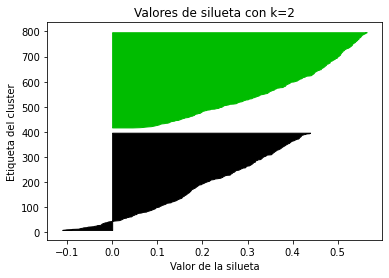

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 2

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X_all_norm_pca, etiquetas2)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values2 = silhouette_samples(X_all_norm_pca, etiquetas2)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values2 = \
        sample_silhouette_values2[etiquetas2 == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values2.sort()

    size_cluster_i = ith_cluster_silhouette_values2.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values2,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=2')
plt.show() 

El valor promedio es de 0.2932, el cual es muy bajo. Esto se debe a que mediante un k = 2 es complicado dividir el conjunto de observaciones en 2 grupos diferenciados y cohesionados entre si. 

Cabe destacar que el cluster negro presenta valores de silueta negativos, que se corresponden con observaciones mal asigandas. 

In [ ]:
# K = 2, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0



for i in range(len(etiquetas2)):
    if etiquetas2[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas2[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
            
print('__________________________******______________________________')
print('Con k=2 (PARTICIONAL y PCA  como características ')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)   

__________________________******______________________________
Con k=2 (PARTICIONAL y PCA  como características 
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 184
Numero de pacientes diabéticos en el Cluster 1: 204
Número de pacientes NO diabéticos en el Cluster 2:  316
Número de pacientes diabéticos en el Cluster 2: 64
___________________________
Número total de pacientes en el Cluster 1: 388
Número total de pacientes en el Cluster 2: 380


In [ ]:
 for index, value in enumerate (etiquetas2):
    if value == 0:
        etiquetas2[index]=1
    if value == 1:
        etiquetas2[index]=0

In [ ]:
accuracy_2_pca,recall_2_pca,f1_2_pca,specificity_2_pca = figuras_merito(etiquetas2,labels)

print("Accuracy con k = 2 ", accuracy_2_pca)
print("Sensibilidad con k = 2 ", recall_2_pca)
print("F1 con k = 2 ", f1_2_pca)
print("Specificity con k = 2 ", specificity_2_pca)

Accuracy con k = 2  0.6770833333333334
Sensibilidad con k = 2  0.7611940298507462
F1 con k = 2  0.621951219512195
Specificity con k = 2  0.632


## k = 3

In [ ]:
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans3 = KMeans(n_clusters=3, verbose=0, init='random', random_state=0).fit(X_all_norm_pca)
centroids3 = kmeans3.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 3-medias: ')
print(centroids3)

print('Suma del Error cuadrático: ')
print(kmeans3.inertia_)




Coordenadas de los centroides resultantes del algoritmo 3-medias: 
[[ 1.11571418  1.06743842 -0.18708206]
 [ 0.70896987 -1.28340719  0.06118034]
 [-1.53537408  0.04475975  0.11851139]]
Suma del Error cuadrático: 
1909.6033515548506


El error cuadrático es de 1909.603, menor el obtenido con k = 2. Esto se debe a que a medida que aumenta el número de grupos (clusters), la distancia de cada observación a cada uno de los centroides es menor y el error cuadrático disminuye. 

In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 



etiquetas3_pca = kmeans3.labels_




Para n_clusters = 3 , el valor medio de la silueta es: 0.3081732220087802


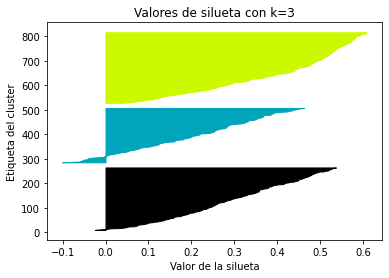

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 3

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X_all_norm_pca, etiquetas3_pca)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values3 = silhouette_samples(X_all_norm_pca, etiquetas3_pca)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values3 = \
        sample_silhouette_values3[etiquetas3_pca == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values3.sort()

    size_cluster_i = ith_cluster_silhouette_values3.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values3,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=3')
plt.show() 

El valor promedio ha aumentado con respecto al anterior, siendo éste 0.30817. Con tres clusters se ha conseguido que uno de ellos aumente hasta 0.6 con lo que aumenta la fiabilidad de encontrarse en el cluster correcto. Sin embargo, con esta agrupación sigue habiendo observaciones mal asignadas (silueta negativa). 






In [ ]:
# K = 3, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0


for i in range(len(etiquetas3_pca)):
    if etiquetas3_pca[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas3_pca[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas3_pca[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
            
print('__________________________******______________________________')
print('Con k=3 (PARTICIONAL y PCA  como características ')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3: ',no_diab3)
print('Número de pacientes diabéticos en el Cluster 3:',diab3)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2) 
print('Número total de pacientes en el Cluster 3:',cluster3)    

__________________________******______________________________
Con k=3 (PARTICIONAL y PCA  como características 
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 125
Numero de pacientes diabéticos en el Cluster 1: 131
Número de pacientes NO diabéticos en el Cluster 2:  116
Número de pacientes diabéticos en el Cluster 2: 107
Número de pacientes NO diabéticos en el Cluster 3:  259
Número de pacientes diabéticos en el Cluster 3: 30
___________________________
Número total de pacientes en el Cluster 1: 256
Número total de pacientes en el Cluster 2: 223
Número total de pacientes en el Cluster 3: 289


In [ ]:
for index, value in enumerate (etiquetas3_pca):
    if value == 0:
        etiquetas3_pca[index]=1
    if value == 1:
        etiquetas3_pca[index]=0
    if value == 2:
        etiquetas3_pca[index]=0

In [ ]:
accuracy_3_pca,recall_3_pca,f1_3_pca,specificity_3_pca = figuras_merito(etiquetas3_pca,labels)

print("Accuracy con k = 3 ", accuracy_3_pca)
print("Sensibilidad con k = 3 ", recall_3_pca)
print("F1 con k = 3 ", f1_3_pca)
print("Specificity con k = 3 ", specificity_3_pca)

Accuracy con k = 3  0.6588541666666666
Sensibilidad con k = 3  0.48880597014925375
F1 con k = 3  0.5
Specificity con k = 3  0.75


## k = 4

In [ ]:
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans4 = KMeans(n_clusters=4, verbose=0, init='random', random_state=0).fit(X_all_norm_pca)
centroids4 = kmeans4.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 4-medias: ')
print(centroids4)

print('Suma del Error cuadrático: ')
print(kmeans4.inertia_)




Coordenadas de los centroides resultantes del algoritmo 4-medias: 
[[-1.61927205  0.10959563  0.16982822]
 [ 1.74248487 -0.09877548  1.86607975]
 [ 0.41354808 -1.31705699 -0.40992616]
 [ 0.92158196  1.08975212 -0.44416757]]
Suma del Error cuadrático: 
1577.5902256127965


El error cuadrático es de 1577.590, siendo éste menor a los obtenidos anteriormente. Esto se debe a que, como se ha comentado con k = 3, a medida que aumenta el número de grupos (clusters), la distancia de cada observación a cada uno de los centroides es menor y el error cuadrático disminuye.


In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 



etiquetas4_pca = kmeans4.labels_





Para n_clusters = 4 , el valor medio de la silueta es: 0.3140572925155418


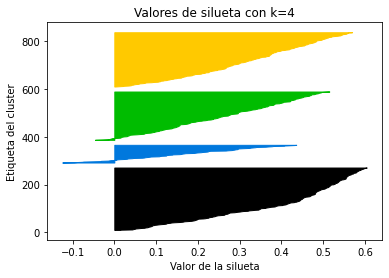

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 4

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X_all_norm_pca, etiquetas4_pca)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values4 = silhouette_samples(X_all_norm_pca, etiquetas4_pca)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values4 = \
        sample_silhouette_values4[etiquetas4_pca == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values4.sort()

    size_cluster_i = ith_cluster_silhouette_values4.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values4,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=4')
plt.show() 

El valor promedio ha aumentado con respecto al anterior, siendo éste 0.31406. Con 4 clusters disminuye la variación intracluster en relación con la variación intercluster, comparado con los anteriores. El valor máximo de silueta se mantiene a 0.6 y siguen apareciendo observaciones mal asignadas como en k = 3 y k = 2. 



In [ ]:
# K = 4, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0

cluster4=0
diab4 = 0
no_diab4 = 0

for i in range(len(etiquetas4_pca)):
    if etiquetas4_pca[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas4_pca[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas4_pca[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
    if etiquetas4_pca[i]==3:
        cluster4+=1
        if labels[i]==0:
            no_diab4+=1
        else:
            diab4+=1
            
print('__________________________******______________________________')
print('Con k=4 (PARTICIONAL y PCA  como características ')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3: ',no_diab3)
print('Número de pacientes diabéticos en el Cluster 3:',diab3)
print('Número de pacientes NO diabéticos en el Cluster 4: ',no_diab4)
print('Número de pacientes diabéticos en el Cluster 4:',diab4)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)
print('Número total de pacientes en el Cluster 3:',cluster3)
print('Número total de pacientes en el Cluster 4:',cluster4)    

__________________________******______________________________
Con k=4 (PARTICIONAL y PCA  como características 
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 238
Numero de pacientes diabéticos en el Cluster 1: 24
Número de pacientes NO diabéticos en el Cluster 2:  24
Número de pacientes diabéticos en el Cluster 2: 51
Número de pacientes NO diabéticos en el Cluster 3:  116
Número de pacientes diabéticos en el Cluster 3: 87
Número de pacientes NO diabéticos en el Cluster 4:  122
Número de pacientes diabéticos en el Cluster 4: 106
___________________________
Número total de pacientes en el Cluster 1: 262
Número total de pacientes en el Cluster 2: 75
Número total de pacientes en el Cluster 3: 203
Número total de pacientes en el Cluster 4: 228


In [ ]:
for index, value in enumerate (etiquetas4_pca):
    if value == 2:
        etiquetas4_pca[index]=0
    if value == 3:
        etiquetas4_pca[index]=0

In [ ]:
accuracy_4_pca,recall_4_pca,f1_4_pca,specificity_4_pca = figuras_merito(etiquetas4_pca,labels)

print("Accuracy con k = 4 ", accuracy_4_pca)
print("Sensibilidad con k = 4 ", recall_4_pca)
print("F1 con k = 4 ", f1_4_pca)
print("Specificity con k = 4 ", specificity_4_pca)

Accuracy con k = 4  0.6861979166666666
Sensibilidad con k = 4  0.19029850746268656
F1 con k = 4  0.29737609329446063
Specificity con k = 4  0.952


## k = 5

In [ ]:
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans5 = KMeans(n_clusters=5, verbose=0, init='random', random_state=0).fit(X_all_norm_pca)
centroids5 = kmeans5.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 5-medias: ')
print(centroids5)

print('Suma del Error cuadrático: ')
print(kmeans5.inertia_)




Coordenadas de los centroides resultantes del algoritmo 5-medias: 
[[-2.00851216  0.30593551  0.21545161]
 [ 1.79917838 -0.06407079  1.90186428]
 [ 1.05782576 -1.4598693  -0.75029424]
 [-0.47794934 -0.52625074  0.03140738]
 [ 0.98711155  1.25452194 -0.46029382]]
Suma del Error cuadrático: 
1402.1561001296795


El error cuadrático es de 1402.156, siendo éste menor a los obtenidos anteriormente. Esto se debe a que, como se ha comentado con k = 3 y k = 4 , a medida que aumenta el número de grupos (clusters),la distancia de cada observación a cada uno de los centroides es menor y el error cuadrático disminuye.


In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 


etiquetas5_pca = kmeans5.labels_



Para n_clusters = 5 , el valor medio de la silueta es: 0.2604127650144526


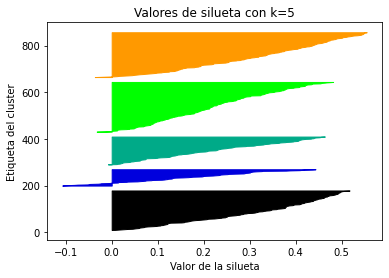

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 5

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X_all_norm_pca, etiquetas5_pca)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values5 = silhouette_samples(X_all_norm_pca, etiquetas5_pca)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values5 = \
        sample_silhouette_values5[etiquetas5_pca == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values5.sort()

    size_cluster_i = ith_cluster_silhouette_values5.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values5,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=5')
plt.show() 

El valor promedio ha disminuido con respecto al anterior, siendo éste 0.2604. 

In [ ]:
# K = 5, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0

cluster3=0
diab3 = 0
no_diab3 = 0


cluster4=0
diab4 = 0
no_diab4 = 0

cluster5=0
diab5 = 0
no_diab5 = 0

for i in range(len(etiquetas5_pca)):
    if etiquetas5_pca[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas5_pca[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
    if etiquetas5_pca[i]==2:
        cluster3+=1
        if labels[i]==0:
            no_diab3+=1
        else:
            diab3+=1
    if etiquetas5_pca[i]==3:
        cluster4+=1
        if labels[i]==0:
            no_diab4+=1
        else:
            diab4+=1
    if etiquetas5_pca[i]==4:
        cluster5+=1
        if labels[i]==0:
            no_diab5+=1
        else:
            diab5+=1
            
print('__________________________******______________________________')
print('Con k=5 (PARTICIONAL y PCA  como características ')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('Número de pacientes NO diabéticos en el Cluster 3:',no_diab3)
print('Numero de pacientes diabéticos en el Cluster 3:',diab3)
print('Número de pacientes NO diabéticos en el Cluster 4: ',no_diab4)
print('Número de pacientes diabéticos en el Cluster 4:',diab4)
print('Número de pacientes NO diabéticos en el Cluster 5: ',no_diab5)
print('Número de pacientes diabéticos en el Cluster 5:',diab5)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)  
print('Número total de pacientes en el Cluster 3:',cluster3)
print('Número total de pacientes en el Cluster 4:',cluster4) 
print('Número total de pacientes en el Cluster 5:',cluster5)


__________________________******______________________________
Con k=5 (PARTICIONAL y PCA  como características 
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 162
Numero de pacientes diabéticos en el Cluster 1: 8
Número de pacientes NO diabéticos en el Cluster 2:  22
Número de pacientes diabéticos en el Cluster 2: 49
Número de pacientes NO diabéticos en el Cluster 3: 67
Numero de pacientes diabéticos en el Cluster 3: 53
Número de pacientes NO diabéticos en el Cluster 4:  145
Número de pacientes diabéticos en el Cluster 4: 69
Número de pacientes NO diabéticos en el Cluster 5:  104
Número de pacientes diabéticos en el Cluster 5: 89
___________________________
Número total de pacientes en el Cluster 1: 170
Número total de pacientes en el Cluster 2: 71
Número total de pacientes en el Cluster 3: 120
Número total de pacientes en el Cluster 4: 214
Número total de pacientes en el Cluster 5: 193


In [ ]:
for index, value in enumerate (etiquetas5_pca):
    if value == 2:
        etiquetas5_pca[index]=0
    if value == 3:
        etiquetas5_pca[index]=0
    if value == 4:
        etiquetas5_pca[index]=0

In [ ]:
accuracy_5_pca,recall_5_pca,f1_5_pca,specificity_5_pca = figuras_merito(etiquetas5_pca,labels)

print("Accuracy con k = 5 ", accuracy_5_pca)
print("Sensibilidad con k = 5 ", recall_5_pca)
print("F1 con k = 5 ", f1_5_pca)
print("Specificity con k = 5 ", specificity_5_pca)

Accuracy con k = 5  0.6861979166666666
Sensibilidad con k = 5  0.1828358208955224
F1 con k = 5  0.28908554572271383
Specificity con k = 5  0.956


In [ ]:
Tabla = pd.DataFrame({ "Prestaciones":["Silueta avg","SSE","Accuracy","Sensibilidad","F1","Specificity"],
                      "k = 2" : ["0.2932","2527.665",accuracy_2_pca,recall_2_pca,f1_2_pca,specificity_2_pca],
                      "k = 3" : ["0.3081"," 1909.603",accuracy_3_pca,recall_3_pca,f1_3_pca,specificity_3_pca],
                     "k = 4" : ["0.31405","1577.59",accuracy_4_pca,recall_4_pca,f1_4_pca,specificity_4_pca],
                     "k = 5" : ["0.2604","1402.16",accuracy_5_pca,recall_5_pca,f1_5_pca,specificity_5_pca]})
Tabla

,Prestaciones,k = 2,k = 3,k = 4,k = 5
0,Silueta avg,0.2932,0.3081,0.31405,0.2604
1,SSE,2527.665,1909.603,1577.59,1402.16
2,Accuracy,0.677083,0.658854,0.686198,0.686198
3,Sensibilidad,0.761194,0.488806,0.190299,0.182836
4,F1,0.621951,0.5,0.297376,0.289086
5,Specificity,0.632,0.75,0.952,0.956


Mediante una evaluación puramente no supervisada el valor de silueta auementa a medida que se incrementan el número de cluster hasta k = 5, donde ya diminuye. En el caso de el error cuadrático disminuye a medida que aumenta k. Esta disminución es debida a que al incrementar el número de clusters la distancia intracluster es menor. 

Por otro lado, en la evaluación externa se experimentan cambios. El accuracy se mantiene en todas las agrupaciones, siendo ligeramenete superior en k = 4. En cambio, la sensibilidad disminuye drásticamnete a partir de k = 3, lo mismo sucede con F1.  Por otra parte, la especificidad presenta un comportamiento contrario, auementa a medida que k es mayor. 

Por tanto, si el objetivo es detectar a los no diabéticos la elección sería de k = 4 ya que presenta la mayor silueta y una alta especificidad, además de tener el mejor accuracy. Sin embargo, si el objetivo es detectar a los diabéticos, se elegiría k = 2 pues es el que mayor sensibilidad presenta. 

# 5. Comparación de los resultados obtenidos con distintas características y esquemas de agrupamiento 

**Considerando el esquema de agrupamiento elegido al final del Apartado 3, repita el procedimiento considerando:**

### **a) las dos características elegidas en la práctica anterior con el estadístico chi cuadrado**

Las dos características elegidas en la práctica anterior son Glucosa e Insulina.

En el apartado 3 la elegida ha sido agrupamiento particional para k = 2

In [ ]:


X = df[['Insulin','Glucose']] 


# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans2 = KMeans(n_clusters=2, verbose=0, init='random', random_state=0).fit(X)
centroids2 = kmeans2.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 2-medias: ')
print(centroids2)

print('Suma del Error cuadrático: ')
print(kmeans2.inertia_)




Coordenadas de los centroides resultantes del algoritmo 2-medias: 
[[257.63218391 144.2183908 ]
 [112.11894273 118.76064611]]
Suma del Error cuadrático: 
1595194.4314142487


In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 
# Representamos con estrellas rojas las posiciones de los centroides.


etiquetas2 = kmeans2.labels_


# COMENTAR RESULTADOS en clase. ¿Variable principal para hacer la división? ¿Por qué?


Para n_clusters = 2 , el valor medio de la silueta es: 0.6347877120925173


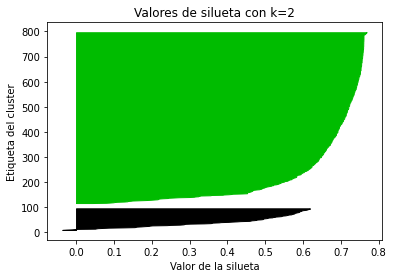

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 2

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X, etiquetas2)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values2 = silhouette_samples(X, etiquetas2)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values2 = \
        sample_silhouette_values2[etiquetas2 == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values2.sort()

    size_cluster_i = ith_cluster_silhouette_values2.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values2,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=2')
plt.show() 

In [ ]:
# K = 2, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0



for i in range(len(etiquetas2)):
    if etiquetas2[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas2[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
            
print('__________________________******______________________________')
print('Con k=2 (PARTICIONAL y chi cuadrado  como características ')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)   

__________________________******______________________________
Con k=2 (PARTICIONAL y chi cuadrado  como características 
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 44
Numero de pacientes diabéticos en el Cluster 1: 43
Número de pacientes NO diabéticos en el Cluster 2:  456
Número de pacientes diabéticos en el Cluster 2: 225
___________________________
Número total de pacientes en el Cluster 1: 87
Número total de pacientes en el Cluster 2: 681


In [ ]:
for index, value in enumerate (etiquetas2):
    if value == 1:
        etiquetas2[index]=0

In [ ]:
accuracy_2_chi,recall_2_chi,f1_2_chi,specificity_2_chi = figuras_merito(etiquetas2,labels)

print("Accuracy con k = 2 ", accuracy_2_chi)
print("Sensibilidad con k = 2 ", recall_2_chi)
print("F1 con k = 2 ", f1_2_chi)
print("Specificity con k = 2 ", specificity_2_chi)

Accuracy con k = 2  0.6510416666666666
Sensibilidad con k = 2  0.0
F1 con k = 2  0.0
Specificity con k = 2  1.0


### **b) las ocho características "originales" (no transformadas por PCA) disponibles.**

In [ ]:
X = df.drop(['Outcome'], axis = 1)
# Ejecutamos el algorimo k-medias y vemos distintos resultados (por defecto, 10 ejecuciones)
kmeans2 = KMeans(n_clusters=2, verbose=0, init='random', random_state=0).fit(X)
centroids2 = kmeans2.cluster_centers_
print('Coordenadas de los centroides resultantes del algoritmo 2-medias: ')
print(centroids2)

print('Suma del Error cuadrático: ')
print(kmeans2.inertia_)

Coordenadas de los centroides resultantes del algoritmo 2-medias: 
[[  3.70454545 143.69318182  72.52272727  31.82954545 256.86363636
   35.21704545   0.544       33.92045455]
 [  3.64558824 118.79117647  72.00735294  28.51764706 112.00441176
   31.78191176   0.42392353  31.98235294]]
Suma del Error cuadrático: 
1852504.0324610288


In [ ]:
#Asignamos a cada ejemplo una etiqueta que corresponde a la identificación del centroide más próximo. 
# Representamos con estrellas rojas las posiciones de los centroides.


etiquetas2_df = kmeans2.labels_


# COMENTAR RESULTADOS en clase. ¿Variable principal para hacer la división? ¿Por qué?


Para n_clusters = 2 , el valor medio de la silueta es: 0.5913602918857238


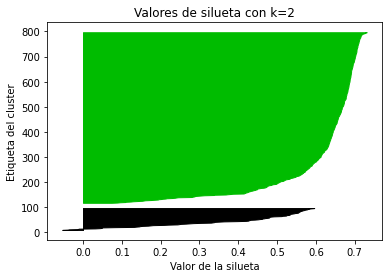

In [ ]:
# Ejemplo del cálculo de la silueta, tanto individual como para el resultado del agrupamiento (valores promedio) 
n_clusters = 2

# Silhouette_score --> valor promedio de la silueta considerando todas las observaciones
silhouette_avg = silhouette_score(X, etiquetas2_df)
print("Para n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values2 = silhouette_samples(X, etiquetas2_df)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values2 = \
        sample_silhouette_values2[etiquetas2_df == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values2.sort()

    size_cluster_i = ith_cluster_silhouette_values2.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values2,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=2')
plt.show() 

In [ ]:
# K = 2, con el cluster con las características sin normalizar,y con clustering aglomerativo

diab_count = 0
no_diab_count = 0

cluster1=0
diab1 = 0
no_diab1 = 0


cluster2=0
diab2 = 0
no_diab2 = 0



for i in range(len(etiquetas2_df)):
    if etiquetas2_df[i]==0:
        cluster1+=1
        if labels[i]==0:
            no_diab1+=1
        else:
            diab1+=1
    if etiquetas2_df[i]==1:
        cluster2+=1
        if labels[i]==0:
            no_diab2+=1
        else:
            diab2+=1
            
print('__________________________******______________________________')
print('Con k=2 (PARTICIONAL y todas características ')
print('__________________________******______________________________')
print('Número de pacientes NO diabéticos en el Cluster 1:',no_diab1)
print('Numero de pacientes diabéticos en el Cluster 1:',diab1)
print('Número de pacientes NO diabéticos en el Cluster 2: ',no_diab2)
print('Número de pacientes diabéticos en el Cluster 2:',diab2)
print('___________________________')
print('Número total de pacientes en el Cluster 1:',cluster1)
print('Número total de pacientes en el Cluster 2:',cluster2)   

__________________________******______________________________
Con k=2 (PARTICIONAL y todas características 
__________________________******______________________________
Número de pacientes NO diabéticos en el Cluster 1: 45
Numero de pacientes diabéticos en el Cluster 1: 43
Número de pacientes NO diabéticos en el Cluster 2:  455
Número de pacientes diabéticos en el Cluster 2: 225
___________________________
Número total de pacientes en el Cluster 1: 88
Número total de pacientes en el Cluster 2: 680


In [ ]:
for index, value in enumerate (etiquetas2_df):
    if value == 1:
        etiquetas2_df[index]=0

In [ ]:
accuracy_2_df,recall_2_df,f1_2_df,specificity_2_df = figuras_merito(etiquetas2_df,labels)

print("Accuracy con k = 2 ", accuracy_2_df)
print("Sensibilidad con k = 2 ", recall_2_df)
print("F1 con k = 2 ", f1_2_df)
print("Specificity con k = 2 ", specificity_2_df)

Accuracy con k = 2  0.6510416666666666
Sensibilidad con k = 2  0.0
F1 con k = 2  0.0
Specificity con k = 2  1.0


**Teniendo en cuenta los valores de silueta, extraiga conclusiones sobre la consideración de una, dos y ocho características. Discuta también los resultados considerando las componentes principales del apartado anterior.**

**Teniendo en cuenta la variable binaria “Outcome” y las medidas de calidad de la clasificación obtenida, extraiga conclusiones sobre la consideración de una, dos y ocho características. Incluya los resultados considerando también los escenarios con componentes principales.**

In [ ]:
Tabla = pd.DataFrame({ "Prestaciones":["Silueta avg","SSE","Accuracy","Sensibilidad","F1","Specificity"],
                      "Chi" : ["0.6347","1595194.43",accuracy_2_chi,recall_2_chi,f1_2_chi,specificity_2_chi],
                      "BMI" : ["0.5368","21437.495",accuracy_2_bmi,recall_2_bmi,f1_2_bmi,specificity_2_bmi],
                      "Todas carac" : ["0.5913"," 1852676.572",accuracy_2_df,recall_2_df,f1_2_df,specificity_2_df],
                      "PCA" : ["0.2932","2527.665",accuracy_2_pca,recall_2_pca,f1_2_pca,specificity_2_pca]})
Tabla

,Prestaciones,Chi,BMI,Todas carac,PCA
0,Silueta avg,0.6347,0.5368,0.5913,0.2932
1,SSE,1595194.43,21437.495,1852676.572,2527.665
2,Accuracy,0.651042,0.651042,0.651042,0.677083
3,Sensibilidad,0,0,0,0.761194
4,F1,0,0,0,0.621951
5,Specificity,1,1,1,0.632


Según la silueta chi2 es el que mejor resultados obtiene. Las características Glucosa e Insulina consiguen crear cluster más compactos y más separables, consiguiendo observaciones que alcanzan un valor de silueta de 0.8. Por otro lado, con todas las características se obtiene el segundo mejor valor de silueta. Esto puede significar que para el caso de realizar un aprendizaje no supervisado sería conveniente realizar una selección de características. 

Cabe destacar que pca obtiene un valor significativamente inferior siendo éste muy cercano a cero. Por lo qué no sería elegida como modelo de agrupación para este conjunto de datos. 

En cuanto a una evaluación externa, cabe destacar como tanto chi2 como bmi y todas las características obtienen las mismas prestaciones, siendo no muy adecuadas ya que no detectarían a los diabéticos (clase minoritaria). Por tanto, utilizarlos como clasificación mediante agrupamiento no sería correcto. 


**Discuta los resultados obtenidos al clasificar las observaciones con una estrategia no supervisada seguida de evaluación externa versus las prestaciones obtenidas a partir del diseño de un clasificador (prácticas anteriores). ¿Qué debería haber hecho para que la comparación fuera justa?**

**Nota: en relación a la última cuestión, no es necesario realizar la nueva implementación, sólo explicar por qué la comparación no es justa e indicar de manera breve y concisa qué pasos debería haber seguido para una comparación más justa.**

Las prestaciones son similares cuando la estrategia no supervisada se ha realizado con Glucosa y BMI como variables de entrada mediante agrupamiento particional, y el diseño del clasificador en prácticas anteriores se ha realizado con todas las características. Si el agrupamiento particional se realizara con todas las características, como se ha podido observar en el anterior apartado, no permitía diferenciar entre diabéticos y no diabéticos, por lo que las prestaciones serían totalmente diferentes. Sin embargo, esta comparación no es justa debido a que el diseño del clasificador en prácticas anteriores se hacía bajo una partición del conjunto de datos en train y test, mientras que en la estrategia no supervisada no (se hace con todo el conjunto de datos). Por lo que, para que la comparación fuera justa, sería necesario realizar una partición de los datos, en la estrategia no supervisada, en train y test. 